   # Titanic EDA & ML                                                    

   In this notebook, I will be study on **Titanic Dataset on Kaggle**. Since this is my first time on EDA & ML notebook on kaggle, I chose the most worked on dataset on Kaggle. So that, I am very glad to share this notebook with everyone and be thankful anyone who were shared on Kaggle which was really helpful for me.
   
   So firstly, I wil be focusing on the data in general. Then, I will work on the features separately. While I am working on features, I make my own dataset for ML techniques which I will focusing on ML part. So that, sorry for that disorganized structure which you maybe need to jump from branch(feature) to branch(feature) :).

So lets import our libraries first.

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# preprocessing
import sklearn
from sklearn.preprocessing import LabelEncoder

# ML
from sklearn. model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier

Then, import our dataset as well.

In [2]:
train = pd.read_csv("../Titanic_eda/datasets/train.csv")
test = pd.read_csv("../Titanic_eda/datasets/test.csv")
df_set = [train, test]

Lets check them briefly

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


For the first impressions on the dataset, has consists of 891 rows and 12 features with some of the features has missing values. We will look at those in **Missing Values** part. 

We can also make some analysis before we look at the dataset thoroughly.
    * PassengerId looks like a unique for each individual when we look at that values.
    * Age derivated between 15 to 40 so that most of the passengers are young.
    * Fare has very wide range and it can be useful for visualization and analyzing.
    * Pclass looks like a categorical variable which can be take 1, 2 or 3 values and 3 are more than other two values( %50 and %75 are the same). So that it can use also to analyzing the dataset. 
    

## Correlations

In order to understand the relationship between features, we can look at the correlations by using heatmap.

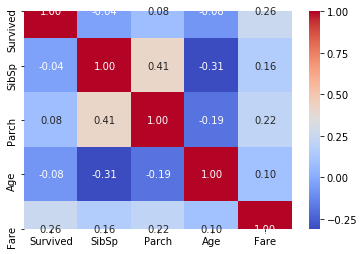

In [7]:
# Correlation matrix
heatmap = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [8]:
pd.DataFrame(abs(train.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007


So that, when we looked at the correlations, we can say that **Pclass** and **Fare** are most important features for **Survived** target feature.

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


When we are looking at the info of our data, we can see that there are some features which need to be transformed into other data types but for now, lets look at the missing values first. 

## Missing Values

 When we are looking at the dataset, we can say that "age" feature has some missing values. However, lets see that in a visual way to see it more clearly.

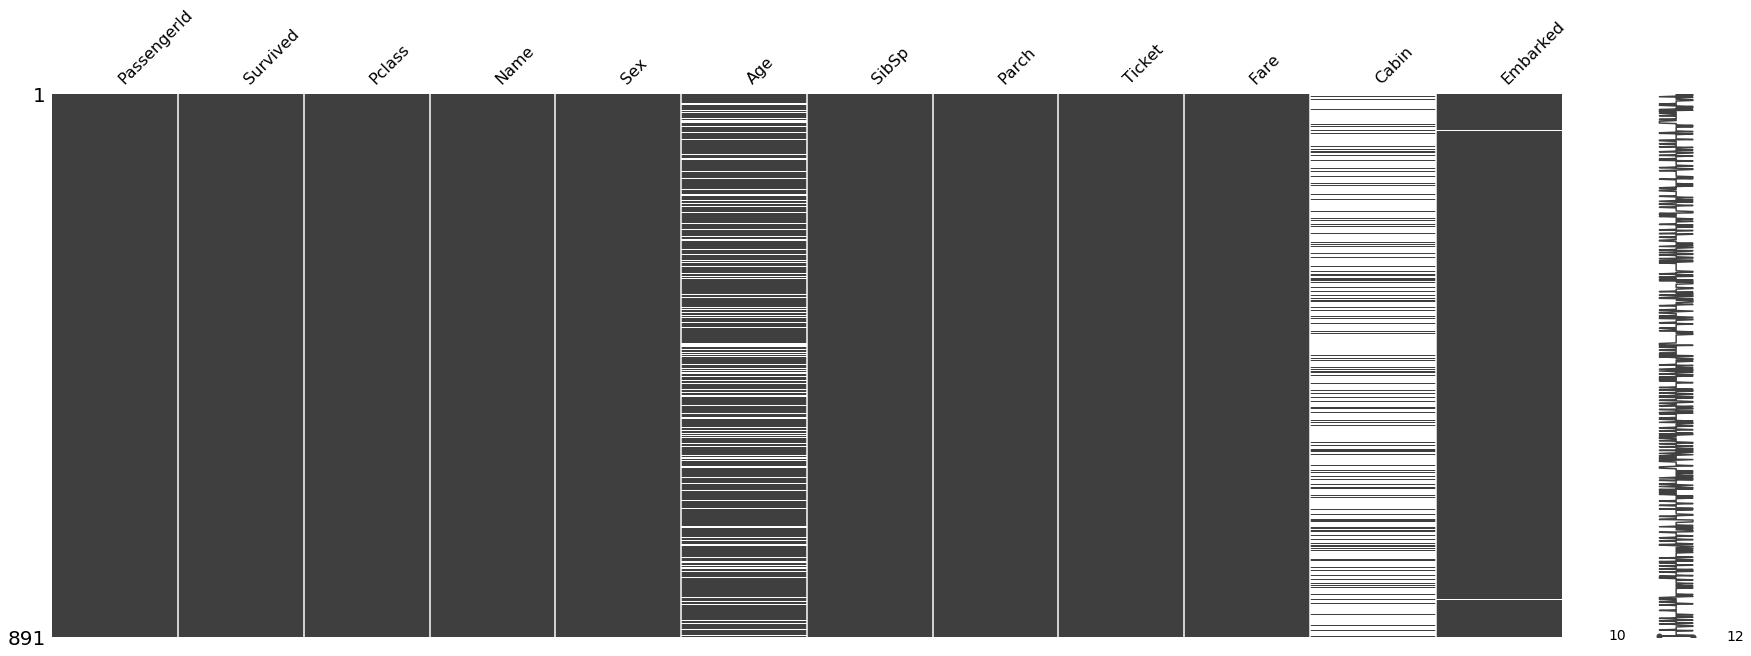

In [10]:
msno.matrix(train, figsize = (30,10));

As we expect, **Age** feature has many missing values by looking at the graph which is above. In addition, our **Cabin** feature has  lots of missing values as well. So lets see is there any correlation between **Age** and **Cabin** features.

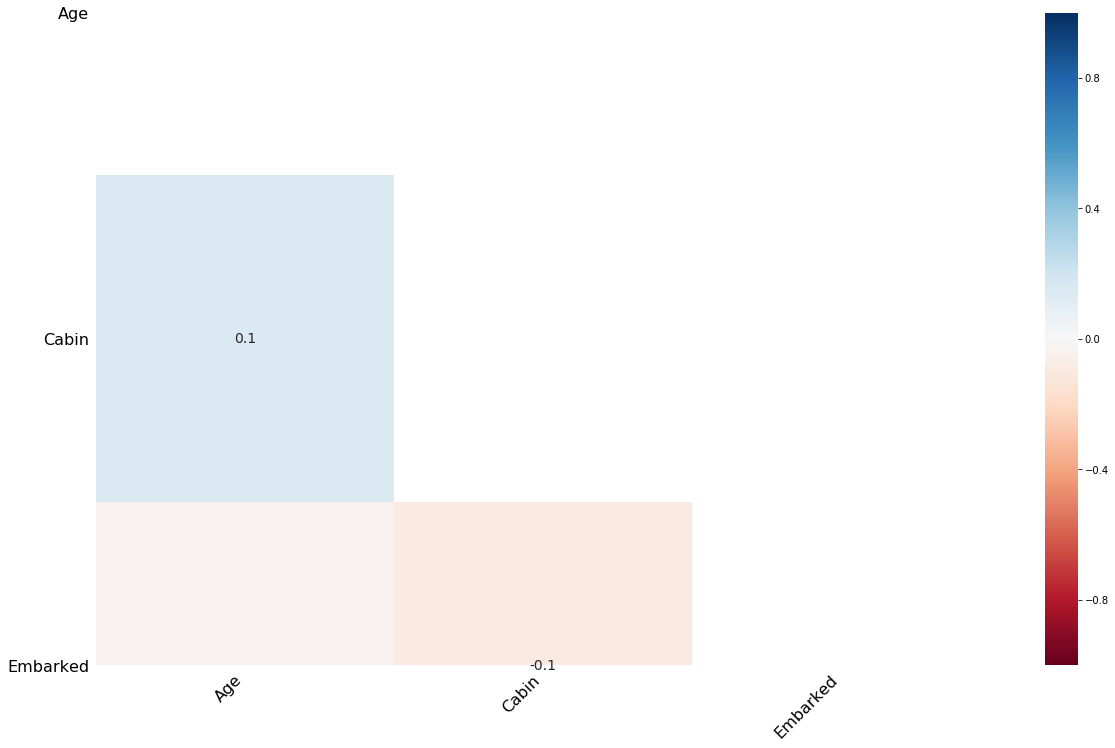

In [11]:
msno.heatmap(train);

Looking at the nullity correlation which is the graph at above, we can see there is **0.1** correlation between **Cabin** and **Age** features which can be ignored. Thus, We do not consider both of them are together while we are filling the missing values at each part.

In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

For a beginning, it is okay to leave it there and try to analyze features first. While we are analysing the data, we can make our own dataset for the prediction after our EDA.

## EDA

#### Survived 

**Survived** feature is consist of two integer which are 0 is referring to the people who are not survived and 1 is referring to the people who are survived at the disaster. Thus, there is no need to change in this feature. Lets just visualize and see the number of survivals.

0    549
1    342
Name: Survived, dtype: int64


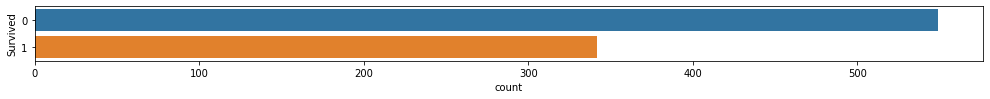

In [13]:
# Survived
fig = plt.figure( figsize = (17,1))
sns.countplot( y = "Survived", data = train);
print(train.Survived.value_counts())

Unfortunately, there are many people who are not survived at the disaster. Best thing we can do for them is  to make sure this type of accidents will never happen again. This is also why we are doing this kind of analysis. 

#### Pclass

**Pclass** is reffering to socieconomic class of passengers. Lets see how many class on dataset.

In [14]:
# Pclass 
train.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [15]:
# Barplot for categorical feature
print(train["Survived"][train['Pclass'] == 1].value_counts(normalize = True)[1])
print(train["Survived"][train['Pclass'] == 2].value_counts(normalize = True)[1])
print(train["Survived"][train['Pclass'] == 3].value_counts(normalize = True)[1])

0.6296296296296297
0.47282608695652173
0.24236252545824846


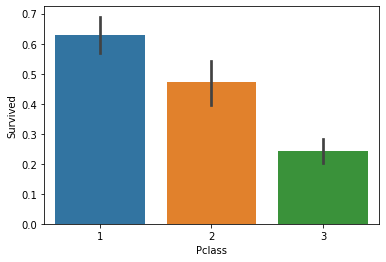

In [16]:
sns.barplot(x = "Pclass", y = "Survived", data = train);

Sadly, we can say that socioeconomic condition of a passenger has a large impact of him/her chance of survival.

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Sex

**Sex** feature is referring to the gender of the passengers. 

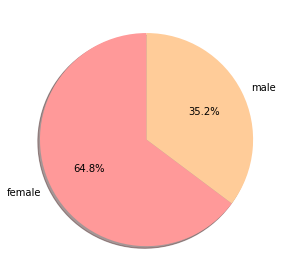

In [18]:
a = train["Sex"].value_counts()
colors = ['#ff9999', '#ffcc99']
genders = ["female","male"]
plt.pie(a, labels= genders, colors = colors, startangle=90, autopct='%.1f%%', shadow = True )
plt.tight_layout()
plt.show()

Probability of Survived Male Passenger:  0.18890814558058924
Probability of Survived Female Passenger:  0.7420382165605095


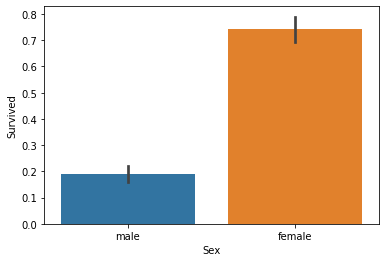

In [19]:
sns.barplot(x = "Sex", y = "Survived", data = train);
print("Probability of Survived Male Passenger: ", train["Survived"][train['Sex'] == "male"].value_counts(normalize = True)[1])
print("Probability of Survived Female Passenger: ", train["Survived"][train['Sex'] == "female"].value_counts(normalize = True)[1])

Even though, there are more number of female passenger than male passenger,  we can see that females have more chance to survive than males have. Also, its understandable when we are thinking gender difference when a disaster occurs. Women and children has precision at evacuation.

In [20]:
for dataset in df_set:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

As you can see at the above, I used dummy encoding for the categorical **Sex** feature. Also, **drop_first = True** parameter is used for to drop most reduntant variable to avoid dependency among the variables. It can be good for some machine learning techniques so that I concern. It is also said that using **drop_first = True** makes the difference between you use dummy encoding or one-hot encoding.

### Age

**Age** is referring to ages of the passengers as you can predict. However, we know **Age** feature has many missing values in dataset. So that, we need to fill these missing values with respect to correlated features

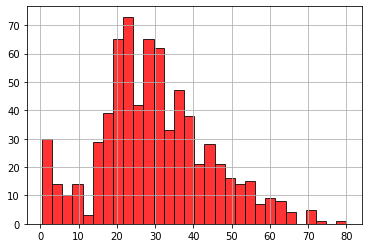

In [21]:
train['Age'].hist(bins=30, color='red',alpha=0.8, edgecolor='black');

In [22]:
train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [23]:
train["Age"].isnull().sum()

177

Age can be useful for making some prediction like in disasters "Children first" sentences are used during the evacuations.

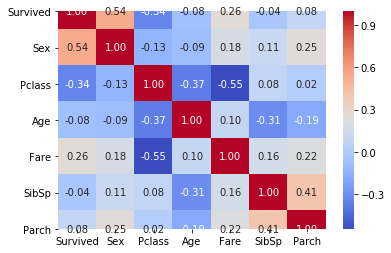

In [24]:
heatmap = sns.heatmap(train[["Survived","Sex","Pclass","Age","Fare","SibSp","Parch"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

When we are looking at the heatmap, we can see the most correlated features with **Age** are **Pclass** and **SibSp**. So that, we can use **Pclass** or **SibSp** for filling the missing values in **Age** feature.

   Pclass   Age
0       1  37.0
1       2  29.0
2       3  24.0


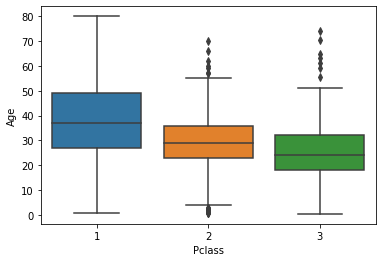

In [25]:
print(train[["Pclass","Age"]].groupby(["Pclass"], as_index = False).median())
sns.boxplot(x = "Pclass", y= "Age" , data = train);

   SibSp   Age
0      0  29.0
1      1  30.0
2      2  23.0
3      3   9.5
4      4   6.5
5      5  11.0
6      8   NaN


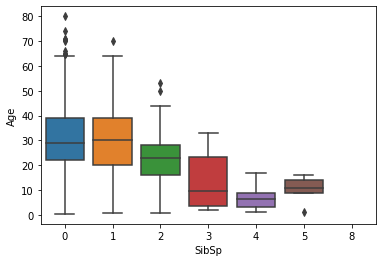

In [26]:
print(train[["SibSp","Age"]].groupby(["SibSp"], as_index = False).median())
sns.boxplot(x = "SibSp", y= "Age" , data = train);

In order to fill the missing values, we will use median of **Age** and **SibSp** features which are get from boxplot at above.

In [27]:
for dataset in df_set:
    miss_age_index = list(dataset["Age"][dataset["Age"].isnull()].index)
    for i in miss_age_index :
        median_age= dataset["Age"].median()
        fill_age = dataset["Age"][((dataset['SibSp'] == dataset.iloc[i]["SibSp"]) & (dataset['Pclass'] == dataset.iloc[i]["Pclass"]))].median()
        if not np.isnan(fill_age) :
            dataset['Age'].iloc[i] = fill_age
        else :
            dataset['Age'].iloc[i] = median_age
    dataset['Age'] = dataset['Age'].astype(int)

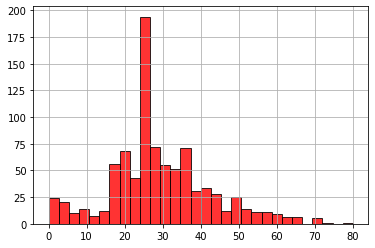

In [28]:
train["Age"].isnull().sum()
train['Age'].hist(bins=30, color='red',alpha=0.8, edgecolor='black');

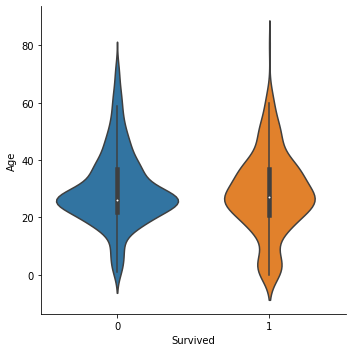

In [29]:
sns.factorplot(x="Survived", y = "Age", data = train, kind="violin");


As we can see it more clearly in violin plot, the more younger people are survived in disaster.

In [30]:
# After we filled the missing values, we can convert it into integer which was float data type and make binning.
train['Age_bin'] = pd.cut(train['Age'], 5)
train[['Age_bin', 'Survived']].groupby(['Age_bin'], as_index=False).mean().sort_values(by='Age_bin', ascending=True)

,Age_bin,Survived
0,"(-0.08, 16.0]",0.528846
1,"(16.0, 32.0]",0.340122
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [31]:
  for dataset in df_set:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), "Age"] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), "Age"] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), "Age"] = 3
    dataset.loc[ dataset['Age'] > 64, "Age"] = 4

train = train.drop(["Age_bin"], axis = 1)
df_set = [train, test]

0.5288461538461539
0.34012219959266804
0.41203703703703703
0.43478260869565216
0.09090909090909091


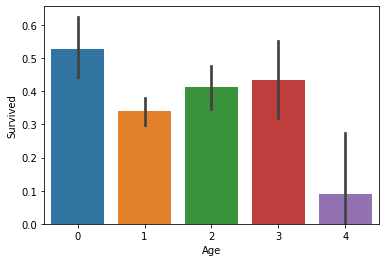

In [32]:
print(train["Survived"][train["Age"] == 0 ].value_counts(normalize = True)[1])
print(train["Survived"][train["Age"] == 1].value_counts(normalize = True)[1])
print(train["Survived"][train["Age"] == 2 ].value_counts(normalize = True)[1])
print(train["Survived"][train["Age"] == 3 ].value_counts(normalize = True)[1])
print(train["Survived"][train["Age"] == 4 ].value_counts(normalize = True)[1])
sns.barplot(x = train["Age"], y = train["Survived"], data = train );

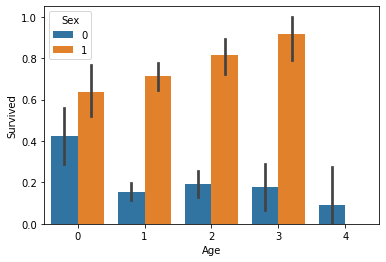

In [33]:
sns.barplot(x = train["Age"], y = train["Survived"], hue = train["Sex"], data = train);

When we looked at the barplot, we can see the effect of Sex feature clearly. Ratio between gender are increased rapidly passenger are older. However, when the age is low, gender has less precision.

### Embarked

**Embarked** feature is showing the port where the passenger boarded the Titanic.

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


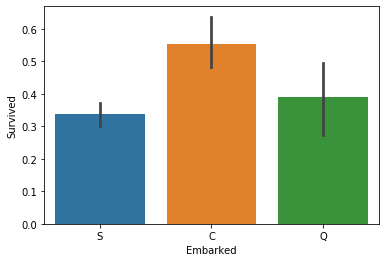

In [34]:
print(train[["Embarked", "Survived"]].groupby(["Embarked"], as_index = False).mean())
sns.barplot(x='Embarked', y='Survived', data=train ,order=['S','C','Q']);

In [35]:
pd.crosstab([train.Embarked, train.Pclass], [train.Sex, train.Survived], margins = True).style.background_gradient(cmap = "Reds")

In [36]:
train["Embarked"].isnull().sum()

2

As we can see, there are only two missing values in "Embarked" feature and it can be useful for our prediction even if it is nothing to do with the disaster. So that, we can fill them with most occured place in our dataset. 

In [37]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Lets fill that two missing values with "S" value which is referring to Southampton and save it our df.

In [38]:
for dataset in df_set:
    dataset["Embarked"] = dataset["Embarked"].fillna("S")

In [39]:
for dataset in df_set:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

### Parch

Parch is the number of parents/children the passenger has aboard the Titanic. Lets look at the distribution of parent/children.

In [40]:
train["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

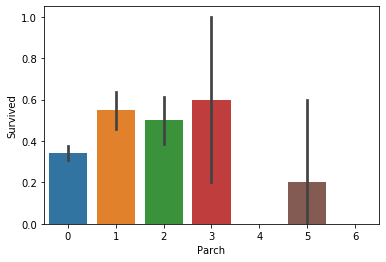

In [41]:
sns.barplot(x='Parch', y='Survived', data=train);

Before we make a comment, lets look at the SibSp too.

### SibSp

SibSp is the number of siblings/spouses the passenger has aboard the Titanic. So it is very relatable feature with Parch

In [42]:
train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

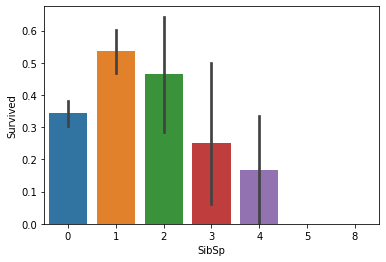

In [43]:
sns.barplot(x= "SibSp", y="Survived", data = train);

Even I look both **SibSp** and **Parch** features, I can not say so much about them. However, if we merge them, we can say that having a relative can change the chance of survival or not? 

### Family

Since, we did not satisfy with Parch and SibSp features, we can make more general feature since they were related.

In [44]:
for dataset in df_set:
    dataset['Has_Family'] =  dataset["Parch"] + dataset["SibSp"]
    dataset['Has_Family'].loc[dataset['Has_Family'] > 0] = 1
    dataset['Has_Family'].loc[dataset['Has_Family'] == 0] = 0

train = train.drop(["SibSp","Parch"], axis = 1 )
test = test.drop(['Parch', 'SibSp'], axis=1)
df_set = [train, test]

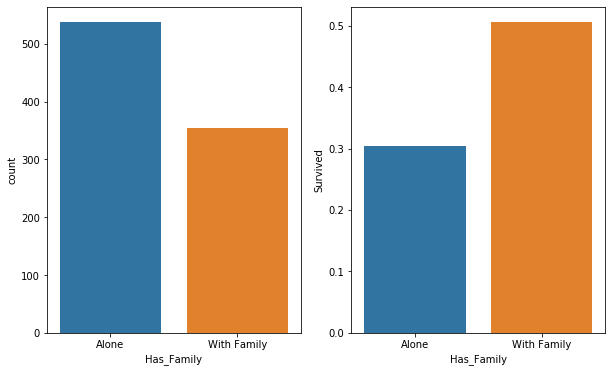

In [45]:
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,6))
sns.countplot(x='Has_Family', data=train, order=[0,1], ax = axis1);
mean_family = train[["Has_Family", "Survived"]].groupby(['Has_Family'],as_index=False).mean()
sns.barplot(x='Has_Family', y='Survived', data=mean_family, order=[0,1], ax = axis2);
axis1.set_xticklabels(["Alone","With Family"], rotation=0);

As we can see, even the people those who are with their family with are less than who are alone, people who are with their family are more likely to survive. So that we keep **Has_Family** feature as a combination of **Parch** and **SibSp**. 

### Name

Name feature is referring to the name of passengers.

In [46]:
train["Name"].nunique()

891

Since we know, there are 891 rows in our dataset, that means all the values on **Name** feature are unique values. So that, it can be bothersome for grouping them into categories. It can be done with many ways. If you are interested in a way to do it, I would recommend https://www.kaggle.com/sinakhorami/titanic-best-working-classifier/. Since, this is my first EDA, I dont work on these feature due to my lack of knowledge.

In [47]:
train = train.drop(["Name", "PassengerId"], axis = 1)
test = test.drop(["Name"], axis = 1)
df_set = [train, test]

### Fare

**Fare** is referring to cost of the ticket. So that, we can think of the cost can be important for our prediction. Then, we can say that the people who bought more expensive or more cheaper tickets are more likely to survive or not. 

In [48]:
test.Fare.isnull().sum()

1

We can fill the missing values with the median for Fare.

In [49]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)

Now , lets look at the how many unique value do we have.

In [50]:
train["Fare"].nunique()

248

Since there are so many unique values in **Fare** feature, we can split them into group. It makes the **Fare** feature more easy to understand and useful for our operations.

In [51]:
train['Fare_bin'] = pd.qcut(train['Fare'], 4)
train[['Fare_bin', 'Survived']].groupby(['Fare_bin'], as_index=False).mean().sort_values(by='Fare_bin', ascending=True)

,Fare_bin,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


After binning our **Fare** feature, we can mapping our Fare values as respect to bins that we divide.

In [52]:
for dataset in df_set:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train = train.drop(["Fare_bin"], axis = 1)
df_set = [train, test]

Now, lets look at the bin size and survived ratio of them.

0.19730941704035873
0.3087557603686636
0.44541484716157204
0.581081081081081


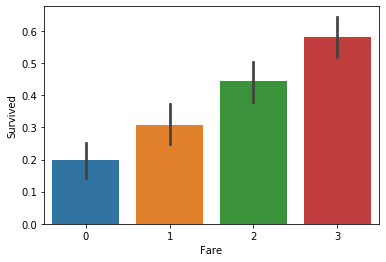

In [53]:
print(train["Survived"][train["Fare"] == 0 ].value_counts(normalize = True)[1])
print(train["Survived"][train["Fare"] == 1].value_counts(normalize = True)[1])
print(train["Survived"][train["Fare"] == 2 ].value_counts(normalize = True)[1])
print(train["Survived"][train["Fare"] == 3 ].value_counts(normalize = True)[1])

sns.barplot(x = train["Fare"], y = train["Survived"], data = train );

Now, we can say that people who bought more expensive tickets are more likely to survive. However, we can also think that "Can we be more spesific about that estimation?" and add another feature.

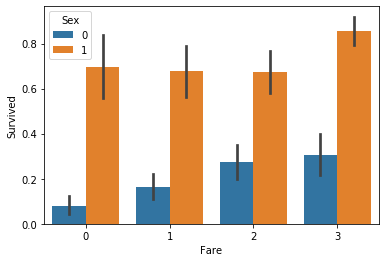

In [54]:
sns.barplot(x = train["Fare"], y = train["Survived"], hue = train["Sex"]);

As we can see, there are more women then men who are survived even though they bought same price of ticket.

### Cabin

**Cabin** feature has the cabin number where passenger stayed in Titanic. It can be divided into groups, but I think, more information about Titanic architecture is needed to make some assumption. Maybe I am so picky about these features since it is my first time. It can also be used for making new features. However, I rather think to drop from datasets.

In [55]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
D              3
              ..
D19            1
B82 B84        1
A31            1
C85            1
E49            1
Name: Cabin, Length: 147, dtype: int64

In [56]:
train = train.drop(["Cabin"], axis = 1)
test = test.drop(["Cabin"], axis = 1)
df_set = [train, test]

### Ticket

**Ticket** feature has the ticket number of the boarding passenger on the dataset. It can be grouped within themselves, but I dont think it can be useful due to the lack of information. If we know which ticket refers to where in the Titanic, we can make it more useful. Maybe I misunderstood this feature.

In [57]:
train.Ticket.value_counts()

CA. 2343         7
1601             7
347082           7
3101295          6
CA 2144          6
                ..
347087           1
12460            1
13568            1
65306            1
SC/PARIS 2146    1
Name: Ticket, Length: 681, dtype: int64

In [58]:
train = train.drop(["Ticket"], axis=1)
test = test.drop(["Ticket"], axis=1)
df_set = [train, test]

In [59]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_Family
0,0,3,0,1,0,0,1
1,1,1,1,2,3,1,1
2,1,3,1,1,1,0,0
3,1,1,1,2,3,0,1
4,0,3,0,2,1,0,0


In [60]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Has_Family
0,892,3,0,2,0,2,0
1,893,3,1,2,0,0,1
2,894,2,0,3,1,2,0
3,895,3,0,1,1,0,0
4,896,3,1,1,1,0,1


### ML

Now, we can use our **df_set** to make prediction with our ML techniques. However, lets select our dependent and indepent variables for classification first.

In [61]:
X_train = train.drop(["Survived"], axis=1)
y_train = train["Survived"]
X_test = test.drop("PassengerId", axis = 1).copy()


I selected the X_train , y_train and X_test from the dataset. I will use 9 techniques on our model and which are : 
        * KNN
        * Logistic Regression
        * Gaussian Naive Bayes
        * Support Vector Classifier
        * Classification and Regression Trees
        * Random Forest
        * Gradient Boosting Machine
        * Extreme Gradient Boost (XGBoost)
        * Light GBM
        * CatBoost
 I will also use Grid Search Cross-Validation for finding best parameters for the our model. Then, I will get the score of them and sort with barplot. Finally, I will decide which model is the best for our data.

### KNN

In [62]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
accuracy = round(knn.score(X_train, y_train)*100, 2)
print("Accuracy before the model tuning is :" + str(accuracy))
#model tuning
knn_params = {'n_neighbors' : np.arange(1, 50),
              'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv= 10)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Accuracy before the model tuning is :83.5
{'n_neighbors': 48, 'weights': 'distance'}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [63]:
knn = KNeighborsClassifier(n_neighbors = 48, weights = "distance")
knn_tuned = knn.fit(X_train, y_train)
y_pred_knn_tuned = knn.predict(X_test)
tuned_accuracy = round(knn_tuned.score(X_train, y_train)*100, 2)
print("Accuracy after the model tuning : " + str(tuned_accuracy))
knn_cv_score = cross_val_score(knn_tuned, X_train, y_train, cv = 10).mean()*100
print("Cross validation score is " + str(knn_cv_score))

Accuracy after the model tuning : 85.63
Cross validation score is 81.15568607422541


### Logistic Regression

In [64]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train, y_train)
y_pred_lr = loj_model.predict(X_test)
accuracy = round(loj.score(X_train, y_train)*100, 2)
print("Accuracy is :" + str(accuracy))
loj_cv_score = cross_val_score(loj, X_train, y_train, cv = 10).mean()*100
print("Cross validation score is " + str(loj_cv_score))


Accuracy is :79.12
Cross validation score is 78.90205425036885


### Gaussian Naive Bayes

In [65]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)

y_pred_gnb = nb_model.predict(X_test)
accuracy = round(nb.score(X_train, y_train)*100, 2)
print("Accuracy is :" + str(accuracy))
nb_cv_score = cross_val_score(nb, X_train, y_train, cv = 10).mean()*100
print("Cross validation score is " + str(nb_cv_score))


Accuracy is :77.44
Cross validation score is 76.89209510838725


### Support Vector Classifier

In [66]:
svm= SVC()
svm_model = svm.fit(X_train, y_train)
y_pred_svc = svm_model.predict(X_test)
accuracy = round(svm.score(X_train, y_train)*100, 2)
print("Accuracy before the model tuning : " + str(accuracy))

#model tuning
svc_params = {"C": np.arange(1,5),
             'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
             'gamma': [.1, .25, .5, .75, 1.0]}

svc = SVC()

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)
print(svc_cv_model.best_params_)


Accuracy before the model tuning : 82.04
Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 440 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 683 tasks      | elapsed:  2.7min


{'C': 3, 'gamma': 0.1, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  5.1min finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [67]:
svc_tuned = SVC(kernel = "rbf", C =1 , gamma = 0.1).fit(X_train, y_train)
y_pred_svc_tuned = svc_tuned.predict(X_test)
tuned_accuracy = round(svc_tuned.score(X_train, y_train)*100, 2)
print("Accuracy after the model tuning : " + str(tuned_accuracy))
svc_cv_score = cross_val_score(svc_tuned, X_train, y_train, cv = 10).mean()*100
print("Cross validation score is " + str(svc_cv_score))

Accuracy after the model tuning : 81.26
Cross validation score is 80.69109635682669


### Classification and Regression Trees

In [68]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)
accuracy = round(cart.score(X_train, y_train)*100, 2)
print("Accuracy before the model tuning : " + str(accuracy))
#model tuning
cart_grid = {"max_depth" : range(1,10),
              "min_samples_split" : list(range(2, 50))}
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)
print(cart_cv_model.best_params_)

Accuracy before the model tuning : 85.63
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2528 tasks      | elapsed:    2.9s


{'max_depth': 4, 'min_samples_split': 2}


[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:    4.7s finished


In [69]:
cart = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 2)
cart_tuned = cart.fit(X_train, y_train)
y_pred_cart_tuned = cart_tuned.predict(X_test)
tuned_accuracy = round(cart_tuned.score(X_train, y_train)*100, 2)
print("Accuracy after the model tuning : " + str(tuned_accuracy))
cart_cv_score = cross_val_score(cart_tuned, X_train, y_train, cv = 10).mean()*100
print("Cross validation score is " + str(cart_cv_score))

Accuracy after the model tuning : 82.49
Cross validation score is 81.70743956418114


### Random Forest

In [70]:
rf_model = RandomForestClassifier().fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy = round(rf_model.score(X_train, y_train)*100, 2)
print("Accuracy before the model tuning :"+ str(accuracy))

#model tuning
rf_params = {"max_depth": [2,5,8,10],
             'criterion' : ['gini', 'entropy'],
            "max_features" : [1,2,3,4,5,6],
            "n_estimators" : [10,500,1000],
            "min_samples_split": [2,5,10]}
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 
rf_cv_model.fit(X_train, y_train)
print("Best parameters are: " + str(rf_cv_model.best_params_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Accuracy before the model tuning :85.41
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 473 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 756 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1121 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1566 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2093 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2700 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 3389 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 4158 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  9.4min finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters are: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 1, 'min_samples_split': 10, 'n_estimators': 500}


Accuracy after model tuning 83.05
Cross validation score is 80.92089433662467


Text(0.5, 0, 'Importances of Parameters')

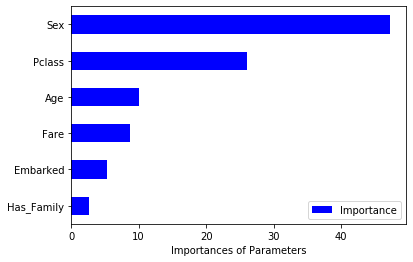

In [71]:
rf_tuned = RandomForestClassifier(max_depth = 5, 
                                  max_features = 6, 
                                  min_samples_split = 2,
                                  n_estimators = 10,
                                 criterion = 'entropy')

rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)
tuned_accuracy = round(rf_tuned.score(X_train, y_train)*100, 2)
print("Accuracy after model tuning", str(tuned_accuracy))
rf_cv_score = cross_val_score(rf_tuned, X_train, y_train, cv = 10).mean()*100
print("Cross validation score is " + str(rf_cv_score))
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "b")

plt.xlabel("Importances of Parameters")

### Gradient Boosting Machine

In [72]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)
y_pred_gbm = gbm_model.predict(X_test)
accuracy = round(gbm_model.score(X_train, y_train)*100, 2)
print("Accuracy before model tuning : " + str(accuracy))
gbm_params = {"learning_rate" : [ 0.01, 0.1, 0.05],
             "n_estimators": [100,500,1000],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv.fit(X_train, y_train)
print("Best Parameters are: " + str(gbm_cv.best_params_))

Accuracy before model tuning : 84.4
Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  3.9min finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Parameters are: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 1000}


In [73]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                min_samples_split = 2,
                                n_estimators = 1000)
gbm_tuned =  gbm.fit(X_train,y_train)
y_pred_gbm_tuned = gbm_tuned.predict(X_test)
tuned_accuracy = round(gbm_tuned.score(X_train, y_train)*100, 2)
print("Accuracy after model tuning :" + str(tuned_accuracy))
gbm_cv_score = cross_val_score(gbm_tuned, X_train, y_train, cv = 10).mean()*100
print("Cross validation score is " + str(gbm_cv_score))

Accuracy after model tuning :84.06
Cross validation score is 81.93471229145386


### Extreme Gradient Boosting(XGBoost) 

In [74]:
xgb_model = XGBClassifier().fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy = round(xgb_model.score(X_train, y_train)*100, 2)
print("Accuracy before the model tuning : " + str(accuracy))

#model tuning
xgb_params = {
        'n_estimators': [100, 500, 1000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.05],
        "min_samples_split": [2,5,10]}
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)
xgb_cv_model.fit(X_train, y_train)
print("Best parameters are : " + str(xgb_cv_model.best_params_))

Accuracy before the model tuning : 83.39
Fitting 10 folds for each of 324 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:  9.8min finished


Best parameters are : {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 500, 'subsample': 0.8}


In [75]:
xgb = XGBClassifier(learning_rate = 0.1, 
                    max_depth = 3,
                    min_samples_split = 2,
                    n_estimators = 500,
                    subsample = 0.8)
xgb_tuned =  xgb.fit(X_train,y_train)
y_pred_xgb_tuned = xgb_tuned.predict(X_test)
tuned_accuracy = round(xgb_tuned.score(X_train, y_train)*100, 2)
print("Accuracy after the model tuning : " + str(tuned_accuracy))
xgb_cv_score = cross_val_score(xgb_tuned, X_train, y_train, cv = 10).mean()*100
print("Cross validation score is " + str(xgb_cv_score))

Accuracy after the model tuning : 84.85
Cross validation score is 82.72247758483712


### Light GBM

In [76]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)
accuracy = round(knn.score(X_train, y_train)*100, 2)
print("Accuracy before the model tuning : " + str(accuracy))
lgbm_params = {
        'n_estimators': [100, 500, 1000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.05],
        "min_child_samples": [5,10,20]}
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)
lgbm_cv_model.fit(X_train, y_train)
print(" Best parameters are : " + str(lgbm_cv_model.best_params_))

Accuracy before the model tuning : 85.63
Fitting 10 folds for each of 324 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 420 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 652 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 985 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 1483 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 1990 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2736 tasks      | elapsed:  1.7min


 Best parameters are : {'learning_rate': 0.05, 'max_depth': 3, 'min_child_samples': 10, 'n_estimators': 500, 'subsample': 0.6}


[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:  2.2min finished


In [77]:
lgbm = LGBMClassifier(learning_rate = 0.05, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 10)
lgbm_tuned = lgbm.fit(X_train,y_train)
y_pred_lgbm_tuned = lgbm_tuned.predict(X_test)
tuned_accuracy = round(lgbm_tuned.score(X_train, y_train)*100, 2)
print("Accuracy after the model tuning : " + str(tuned_accuracy))
lgbm_cv_score = cross_val_score(lgbm_tuned, X_train, y_train, cv = 10).mean()*100
print("Cross validation score is " + str(lgbm_cv_score))

Accuracy after the model tuning : 84.06
Cross validation score is 82.60762115537396


### CatBoost

In [78]:
cat_model = CatBoostClassifier().fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
accuracy = round(cat_model.score(X_train, y_train)*100, 2)
print("Accuracy before the model tuning : " + str(accuracy))

#model tuning
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8],
    'loss_function' : ['Logloss','CrossEntropy']}
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
print("Best parameters are : " + str(catb_cv_model.best_params_))

Learning rate set to 0.016216
0:	learn: 0.6823712	total: 101ms	remaining: 1m 41s
1:	learn: 0.6764624	total: 114ms	remaining: 57s
2:	learn: 0.6679497	total: 131ms	remaining: 43.6s
3:	learn: 0.6590011	total: 154ms	remaining: 38.3s
4:	learn: 0.6498067	total: 180ms	remaining: 35.9s
5:	learn: 0.6419838	total: 199ms	remaining: 33s
6:	learn: 0.6330408	total: 225ms	remaining: 31.9s
7:	learn: 0.6284112	total: 236ms	remaining: 29.2s
8:	learn: 0.6194067	total: 269ms	remaining: 29.6s
9:	learn: 0.6115012	total: 291ms	remaining: 28.8s
10:	learn: 0.6052803	total: 306ms	remaining: 27.5s
11:	learn: 0.5993042	total: 320ms	remaining: 26.3s
12:	learn: 0.5929409	total: 338ms	remaining: 25.6s
13:	learn: 0.5866493	total: 363ms	remaining: 25.6s
14:	learn: 0.5806036	total: 385ms	remaining: 25.3s
15:	learn: 0.5745026	total: 411ms	remaining: 25.3s
16:	learn: 0.5703971	total: 430ms	remaining: 24.8s
17:	learn: 0.5642050	total: 454ms	remaining: 24.8s
18:	learn: 0.5612677	total: 465ms	remaining: 24s
19:	learn: 0.556

166:	learn: 0.4077481	total: 3.41s	remaining: 17s
167:	learn: 0.4077145	total: 3.42s	remaining: 17s
168:	learn: 0.4076819	total: 3.43s	remaining: 16.9s
169:	learn: 0.4076223	total: 3.45s	remaining: 16.8s
170:	learn: 0.4073881	total: 3.46s	remaining: 16.8s
171:	learn: 0.4068296	total: 3.49s	remaining: 16.8s
172:	learn: 0.4062638	total: 3.52s	remaining: 16.8s
173:	learn: 0.4061902	total: 3.54s	remaining: 16.8s
174:	learn: 0.4061623	total: 3.55s	remaining: 16.7s
175:	learn: 0.4060699	total: 3.56s	remaining: 16.7s
176:	learn: 0.4060369	total: 3.57s	remaining: 16.6s
177:	learn: 0.4059127	total: 3.59s	remaining: 16.6s
178:	learn: 0.4054747	total: 3.62s	remaining: 16.6s
179:	learn: 0.4051300	total: 3.64s	remaining: 16.6s
180:	learn: 0.4051108	total: 3.65s	remaining: 16.5s
181:	learn: 0.4050395	total: 3.67s	remaining: 16.5s
182:	learn: 0.4049295	total: 3.68s	remaining: 16.4s
183:	learn: 0.4047534	total: 3.7s	remaining: 16.4s
184:	learn: 0.4046314	total: 3.71s	remaining: 16.4s
185:	learn: 0.404

331:	learn: 0.3875845	total: 6.29s	remaining: 12.6s
332:	learn: 0.3875816	total: 6.3s	remaining: 12.6s
333:	learn: 0.3875393	total: 6.32s	remaining: 12.6s
334:	learn: 0.3875252	total: 6.33s	remaining: 12.6s
335:	learn: 0.3875150	total: 6.34s	remaining: 12.5s
336:	learn: 0.3875107	total: 6.35s	remaining: 12.5s
337:	learn: 0.3874835	total: 6.37s	remaining: 12.5s
338:	learn: 0.3872169	total: 6.4s	remaining: 12.5s
339:	learn: 0.3872148	total: 6.41s	remaining: 12.4s
340:	learn: 0.3872116	total: 6.42s	remaining: 12.4s
341:	learn: 0.3872092	total: 6.44s	remaining: 12.4s
342:	learn: 0.3871747	total: 6.45s	remaining: 12.4s
343:	learn: 0.3871607	total: 6.47s	remaining: 12.3s
344:	learn: 0.3871196	total: 6.49s	remaining: 12.3s
345:	learn: 0.3870663	total: 6.5s	remaining: 12.3s
346:	learn: 0.3870476	total: 6.52s	remaining: 12.3s
347:	learn: 0.3870409	total: 6.53s	remaining: 12.2s
348:	learn: 0.3869981	total: 6.55s	remaining: 12.2s
349:	learn: 0.3869981	total: 6.56s	remaining: 12.2s
350:	learn: 0.3

491:	learn: 0.3805468	total: 8.79s	remaining: 9.07s
492:	learn: 0.3804454	total: 8.81s	remaining: 9.06s
493:	learn: 0.3803842	total: 8.83s	remaining: 9.05s
494:	learn: 0.3803546	total: 8.85s	remaining: 9.03s
495:	learn: 0.3803513	total: 8.86s	remaining: 9s
496:	learn: 0.3803502	total: 8.87s	remaining: 8.98s
497:	learn: 0.3803373	total: 8.88s	remaining: 8.96s
498:	learn: 0.3803368	total: 8.89s	remaining: 8.93s
499:	learn: 0.3801057	total: 8.92s	remaining: 8.92s
500:	learn: 0.3801011	total: 8.93s	remaining: 8.89s
501:	learn: 0.3800968	total: 8.94s	remaining: 8.87s
502:	learn: 0.3800923	total: 8.95s	remaining: 8.84s
503:	learn: 0.3800918	total: 8.96s	remaining: 8.82s
504:	learn: 0.3800905	total: 8.97s	remaining: 8.79s
505:	learn: 0.3798452	total: 9s	remaining: 8.78s
506:	learn: 0.3798443	total: 9.01s	remaining: 8.76s
507:	learn: 0.3798400	total: 9.02s	remaining: 8.74s
508:	learn: 0.3798369	total: 9.04s	remaining: 8.71s
509:	learn: 0.3798276	total: 9.05s	remaining: 8.69s
510:	learn: 0.3798

654:	learn: 0.3758950	total: 11.1s	remaining: 5.86s
655:	learn: 0.3758945	total: 11.1s	remaining: 5.84s
656:	learn: 0.3758943	total: 11.1s	remaining: 5.82s
657:	learn: 0.3758826	total: 11.2s	remaining: 5.8s
658:	learn: 0.3758804	total: 11.2s	remaining: 5.78s
659:	learn: 0.3758787	total: 11.2s	remaining: 5.76s
660:	learn: 0.3758785	total: 11.2s	remaining: 5.74s
661:	learn: 0.3758698	total: 11.2s	remaining: 5.72s
662:	learn: 0.3758696	total: 11.2s	remaining: 5.7s
663:	learn: 0.3758369	total: 11.2s	remaining: 5.68s
664:	learn: 0.3758239	total: 11.3s	remaining: 5.67s
665:	learn: 0.3758237	total: 11.3s	remaining: 5.65s
666:	learn: 0.3757049	total: 11.3s	remaining: 5.63s
667:	learn: 0.3757043	total: 11.3s	remaining: 5.61s
668:	learn: 0.3756955	total: 11.3s	remaining: 5.6s
669:	learn: 0.3756954	total: 11.3s	remaining: 5.58s
670:	learn: 0.3756939	total: 11.3s	remaining: 5.56s
671:	learn: 0.3756600	total: 11.4s	remaining: 5.54s
672:	learn: 0.3756592	total: 11.4s	remaining: 5.52s
673:	learn: 0.3

817:	learn: 0.3733975	total: 13.5s	remaining: 3s
818:	learn: 0.3733636	total: 13.5s	remaining: 2.98s
819:	learn: 0.3733579	total: 13.5s	remaining: 2.97s
820:	learn: 0.3733565	total: 13.5s	remaining: 2.95s
821:	learn: 0.3733565	total: 13.5s	remaining: 2.93s
822:	learn: 0.3733560	total: 13.6s	remaining: 2.91s
823:	learn: 0.3733311	total: 13.6s	remaining: 2.9s
824:	learn: 0.3732147	total: 13.6s	remaining: 2.88s
825:	learn: 0.3732143	total: 13.6s	remaining: 2.87s
826:	learn: 0.3732058	total: 13.6s	remaining: 2.85s
827:	learn: 0.3731920	total: 13.6s	remaining: 2.83s
828:	learn: 0.3731751	total: 13.6s	remaining: 2.81s
829:	learn: 0.3731750	total: 13.7s	remaining: 2.8s
830:	learn: 0.3731492	total: 13.7s	remaining: 2.78s
831:	learn: 0.3731491	total: 13.7s	remaining: 2.76s
832:	learn: 0.3730741	total: 13.7s	remaining: 2.75s
833:	learn: 0.3730707	total: 13.7s	remaining: 2.73s
834:	learn: 0.3730547	total: 13.7s	remaining: 2.71s
835:	learn: 0.3730415	total: 13.8s	remaining: 2.7s
836:	learn: 0.3730

984:	learn: 0.3700411	total: 16s	remaining: 244ms
985:	learn: 0.3700407	total: 16s	remaining: 228ms
986:	learn: 0.3700403	total: 16.1s	remaining: 211ms
987:	learn: 0.3700400	total: 16.1s	remaining: 195ms
988:	learn: 0.3698859	total: 16.1s	remaining: 179ms
989:	learn: 0.3698859	total: 16.1s	remaining: 163ms
990:	learn: 0.3697790	total: 16.1s	remaining: 146ms
991:	learn: 0.3697790	total: 16.1s	remaining: 130ms
992:	learn: 0.3697789	total: 16.1s	remaining: 114ms
993:	learn: 0.3697751	total: 16.2s	remaining: 97.6ms
994:	learn: 0.3697751	total: 16.2s	remaining: 81.3ms
995:	learn: 0.3697719	total: 16.2s	remaining: 65ms
996:	learn: 0.3697540	total: 16.2s	remaining: 48.8ms
997:	learn: 0.3697536	total: 16.2s	remaining: 32.5ms
998:	learn: 0.3697536	total: 16.2s	remaining: 16.2ms
999:	learn: 0.3697472	total: 16.2s	remaining: 0us
Accuracy before the model tuning : 83.84
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 10.9min finished


0:	learn: 0.6864714	total: 22.3ms	remaining: 11.1s
1:	learn: 0.6820141	total: 39.8ms	remaining: 9.92s
2:	learn: 0.6762948	total: 57.7ms	remaining: 9.55s
3:	learn: 0.6719148	total: 76.2ms	remaining: 9.45s
4:	learn: 0.6658579	total: 97.5ms	remaining: 9.65s
5:	learn: 0.6614875	total: 118ms	remaining: 9.74s
6:	learn: 0.6559298	total: 140ms	remaining: 9.88s
7:	learn: 0.6504092	total: 162ms	remaining: 9.96s
8:	learn: 0.6452879	total: 183ms	remaining: 10s
9:	learn: 0.6401649	total: 207ms	remaining: 10.1s
10:	learn: 0.6356823	total: 224ms	remaining: 9.95s
11:	learn: 0.6309069	total: 242ms	remaining: 9.83s
12:	learn: 0.6253472	total: 264ms	remaining: 9.9s
13:	learn: 0.6211968	total: 279ms	remaining: 9.69s
14:	learn: 0.6185138	total: 290ms	remaining: 9.37s
15:	learn: 0.6140762	total: 312ms	remaining: 9.43s
16:	learn: 0.6095060	total: 338ms	remaining: 9.59s
17:	learn: 0.6049537	total: 361ms	remaining: 9.66s
18:	learn: 0.6025251	total: 372ms	remaining: 9.41s
19:	learn: 0.5985385	total: 391ms	remai

168:	learn: 0.4254594	total: 3.27s	remaining: 6.41s
169:	learn: 0.4251965	total: 3.29s	remaining: 6.39s
170:	learn: 0.4249153	total: 3.31s	remaining: 6.37s
171:	learn: 0.4248859	total: 3.32s	remaining: 6.33s
172:	learn: 0.4245973	total: 3.34s	remaining: 6.32s
173:	learn: 0.4244397	total: 3.37s	remaining: 6.3s
174:	learn: 0.4243515	total: 3.38s	remaining: 6.28s
175:	learn: 0.4237929	total: 3.4s	remaining: 6.26s
176:	learn: 0.4233307	total: 3.42s	remaining: 6.25s
177:	learn: 0.4231170	total: 3.44s	remaining: 6.22s
178:	learn: 0.4226239	total: 3.46s	remaining: 6.21s
179:	learn: 0.4223264	total: 3.48s	remaining: 6.19s
180:	learn: 0.4222587	total: 3.49s	remaining: 6.16s
181:	learn: 0.4221521	total: 3.51s	remaining: 6.14s
182:	learn: 0.4221090	total: 3.52s	remaining: 6.1s
183:	learn: 0.4218429	total: 3.54s	remaining: 6.09s
184:	learn: 0.4216721	total: 3.56s	remaining: 6.07s
185:	learn: 0.4213957	total: 3.58s	remaining: 6.05s
186:	learn: 0.4212620	total: 3.6s	remaining: 6.03s
187:	learn: 0.42

327:	learn: 0.4033636	total: 6.14s	remaining: 3.22s
328:	learn: 0.4030548	total: 6.17s	remaining: 3.2s
329:	learn: 0.4030445	total: 6.18s	remaining: 3.18s
330:	learn: 0.4030167	total: 6.19s	remaining: 3.16s
331:	learn: 0.4029749	total: 6.21s	remaining: 3.14s
332:	learn: 0.4026856	total: 6.23s	remaining: 3.12s
333:	learn: 0.4023986	total: 6.25s	remaining: 3.11s
334:	learn: 0.4023607	total: 6.27s	remaining: 3.09s
335:	learn: 0.4023600	total: 6.28s	remaining: 3.06s
336:	learn: 0.4022201	total: 6.3s	remaining: 3.05s
337:	learn: 0.4022113	total: 6.31s	remaining: 3.02s
338:	learn: 0.4021940	total: 6.33s	remaining: 3s
339:	learn: 0.4020778	total: 6.34s	remaining: 2.98s
340:	learn: 0.4019709	total: 6.36s	remaining: 2.97s
341:	learn: 0.4018884	total: 6.38s	remaining: 2.95s
342:	learn: 0.4018316	total: 6.41s	remaining: 2.93s
343:	learn: 0.4017787	total: 6.42s	remaining: 2.91s
344:	learn: 0.4015816	total: 6.44s	remaining: 2.89s
345:	learn: 0.4015678	total: 6.46s	remaining: 2.87s
346:	learn: 0.401

489:	learn: 0.3924504	total: 8.96s	remaining: 183ms
490:	learn: 0.3923990	total: 8.97s	remaining: 165ms
491:	learn: 0.3923657	total: 8.99s	remaining: 146ms
492:	learn: 0.3922555	total: 9.01s	remaining: 128ms
493:	learn: 0.3922404	total: 9.03s	remaining: 110ms
494:	learn: 0.3922404	total: 9.04s	remaining: 91.3ms
495:	learn: 0.3921048	total: 9.06s	remaining: 73.1ms
496:	learn: 0.3921016	total: 9.07s	remaining: 54.8ms
497:	learn: 0.3920995	total: 9.08s	remaining: 36.5ms
498:	learn: 0.3920016	total: 9.1s	remaining: 18.2ms
499:	learn: 0.3919995	total: 9.12s	remaining: 0us
Best parameters are : {'depth': 5, 'iterations': 500, 'learning_rate': 0.01, 'loss_function': 'Logloss'}


In [79]:
catb = CatBoostClassifier(iterations = 500, 
                          learning_rate = 0.01, 
                          depth = 5,
                         loss_function = "Logloss")

catb_tuned = catb.fit(X_train, y_train, plot = True)
y_pred_catb_tuned = catb_tuned.predict(X_test)
tuned_accuracy = round(catb_tuned.score(X_train, y_train)*100, 2)
print("Accuracy after the model tuning : " + str(tuned_accuracy))
catb_cv_score = cross_val_score(catb_tuned, X_train, y_train, cv = 10).mean()*100
print("Cross validation score is " + str(catb_cv_score))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6864714	total: 32.1ms	remaining: 16s
1:	learn: 0.6820141	total: 57ms	remaining: 14.2s
2:	learn: 0.6762948	total: 79.4ms	remaining: 13.2s
3:	learn: 0.6719148	total: 98.8ms	remaining: 12.3s
4:	learn: 0.6658579	total: 124ms	remaining: 12.3s
5:	learn: 0.6614875	total: 149ms	remaining: 12.3s
6:	learn: 0.6559298	total: 173ms	remaining: 12.2s
7:	learn: 0.6504092	total: 197ms	remaining: 12.1s
8:	learn: 0.6452879	total: 220ms	remaining: 12s
9:	learn: 0.6401649	total: 242ms	remaining: 11.9s
10:	learn: 0.6356823	total: 257ms	remaining: 11.4s
11:	learn: 0.6309069	total: 278ms	remaining: 11.3s
12:	learn: 0.6253472	total: 302ms	remaining: 11.3s
13:	learn: 0.6211968	total: 316ms	remaining: 11s
14:	learn: 0.6185138	total: 327ms	remaining: 10.6s
15:	learn: 0.6140762	total: 350ms	remaining: 10.6s
16:	learn: 0.6095060	total: 375ms	remaining: 10.7s
17:	learn: 0.6049537	total: 399ms	remaining: 10.7s
18:	learn: 0.6025251	total: 411ms	remaining: 10.4s
19:	learn: 0.5985385	total: 431ms	remaining: 

161:	learn: 0.4268608	total: 3.4s	remaining: 7.08s
162:	learn: 0.4267111	total: 3.41s	remaining: 7.06s
163:	learn: 0.4265296	total: 3.43s	remaining: 7.02s
164:	learn: 0.4262843	total: 3.45s	remaining: 7s
165:	learn: 0.4261264	total: 3.47s	remaining: 6.98s
166:	learn: 0.4258528	total: 3.49s	remaining: 6.96s
167:	learn: 0.4255555	total: 3.51s	remaining: 6.93s
168:	learn: 0.4254594	total: 3.52s	remaining: 6.9s
169:	learn: 0.4251965	total: 3.54s	remaining: 6.87s
170:	learn: 0.4249153	total: 3.56s	remaining: 6.85s
171:	learn: 0.4248859	total: 3.57s	remaining: 6.81s
172:	learn: 0.4245973	total: 3.59s	remaining: 6.79s
173:	learn: 0.4244397	total: 3.62s	remaining: 6.78s
174:	learn: 0.4243515	total: 3.63s	remaining: 6.74s
175:	learn: 0.4237929	total: 3.65s	remaining: 6.72s
176:	learn: 0.4233307	total: 3.68s	remaining: 6.71s
177:	learn: 0.4231170	total: 3.69s	remaining: 6.68s
178:	learn: 0.4226239	total: 3.71s	remaining: 6.66s
179:	learn: 0.4223264	total: 3.73s	remaining: 6.64s
180:	learn: 0.422

329:	learn: 0.4030445	total: 6.59s	remaining: 3.4s
330:	learn: 0.4030167	total: 6.61s	remaining: 3.37s
331:	learn: 0.4029749	total: 6.62s	remaining: 3.35s
332:	learn: 0.4026856	total: 6.64s	remaining: 3.33s
333:	learn: 0.4023986	total: 6.66s	remaining: 3.31s
334:	learn: 0.4023607	total: 6.68s	remaining: 3.29s
335:	learn: 0.4023600	total: 6.69s	remaining: 3.27s
336:	learn: 0.4022201	total: 6.71s	remaining: 3.25s
337:	learn: 0.4022113	total: 6.72s	remaining: 3.22s
338:	learn: 0.4021940	total: 6.74s	remaining: 3.2s
339:	learn: 0.4020778	total: 6.76s	remaining: 3.18s
340:	learn: 0.4019709	total: 6.78s	remaining: 3.16s
341:	learn: 0.4018884	total: 6.8s	remaining: 3.14s
342:	learn: 0.4018316	total: 6.83s	remaining: 3.13s
343:	learn: 0.4017787	total: 6.85s	remaining: 3.1s
344:	learn: 0.4015816	total: 6.87s	remaining: 3.09s
345:	learn: 0.4015678	total: 6.89s	remaining: 3.07s
346:	learn: 0.4015467	total: 6.91s	remaining: 3.04s
347:	learn: 0.4015283	total: 6.92s	remaining: 3.02s
348:	learn: 0.40

490:	learn: 0.3923990	total: 9.56s	remaining: 175ms
491:	learn: 0.3923657	total: 9.57s	remaining: 156ms
492:	learn: 0.3922555	total: 9.6s	remaining: 136ms
493:	learn: 0.3922404	total: 9.61s	remaining: 117ms
494:	learn: 0.3922404	total: 9.62s	remaining: 97.2ms
495:	learn: 0.3921048	total: 9.64s	remaining: 77.8ms
496:	learn: 0.3921016	total: 9.65s	remaining: 58.3ms
497:	learn: 0.3920995	total: 9.66s	remaining: 38.8ms
498:	learn: 0.3920016	total: 9.69s	remaining: 19.4ms
499:	learn: 0.3919995	total: 9.71s	remaining: 0us
Accuracy after the model tuning : 83.16
0:	learn: 0.6866916	total: 25.4ms	remaining: 12.7s
1:	learn: 0.6805315	total: 50.5ms	remaining: 12.6s
2:	learn: 0.6749856	total: 78ms	remaining: 12.9s
3:	learn: 0.6692209	total: 105ms	remaining: 13s
4:	learn: 0.6638632	total: 127ms	remaining: 12.6s
5:	learn: 0.6583761	total: 150ms	remaining: 12.4s
6:	learn: 0.6530285	total: 176ms	remaining: 12.4s
7:	learn: 0.6475345	total: 202ms	remaining: 12.4s
8:	learn: 0.6421106	total: 230ms	remain

151:	learn: 0.4293690	total: 3.02s	remaining: 6.91s
152:	learn: 0.4292656	total: 3.03s	remaining: 6.87s
153:	learn: 0.4289471	total: 3.05s	remaining: 6.86s
154:	learn: 0.4284096	total: 3.07s	remaining: 6.84s
155:	learn: 0.4280597	total: 3.09s	remaining: 6.82s
156:	learn: 0.4279329	total: 3.1s	remaining: 6.78s
157:	learn: 0.4278367	total: 3.11s	remaining: 6.74s
158:	learn: 0.4270926	total: 3.14s	remaining: 6.73s
159:	learn: 0.4269959	total: 3.15s	remaining: 6.7s
160:	learn: 0.4267490	total: 3.17s	remaining: 6.67s
161:	learn: 0.4265840	total: 3.18s	remaining: 6.64s
162:	learn: 0.4264157	total: 3.2s	remaining: 6.61s
163:	learn: 0.4262979	total: 3.21s	remaining: 6.58s
164:	learn: 0.4256631	total: 3.23s	remaining: 6.57s
165:	learn: 0.4253334	total: 3.25s	remaining: 6.55s
166:	learn: 0.4252528	total: 3.26s	remaining: 6.51s
167:	learn: 0.4250691	total: 3.28s	remaining: 6.48s
168:	learn: 0.4249518	total: 3.3s	remaining: 6.46s
169:	learn: 0.4245690	total: 3.32s	remaining: 6.45s
170:	learn: 0.42

319:	learn: 0.4019414	total: 6s	remaining: 3.37s
320:	learn: 0.4019036	total: 6.01s	remaining: 3.35s
321:	learn: 0.4018742	total: 6.02s	remaining: 3.33s
322:	learn: 0.4018173	total: 6.04s	remaining: 3.31s
323:	learn: 0.4017286	total: 6.06s	remaining: 3.29s
324:	learn: 0.4016657	total: 6.07s	remaining: 3.27s
325:	learn: 0.4015418	total: 6.09s	remaining: 3.25s
326:	learn: 0.4014043	total: 6.11s	remaining: 3.23s
327:	learn: 0.4012869	total: 6.13s	remaining: 3.21s
328:	learn: 0.4011712	total: 6.15s	remaining: 3.2s
329:	learn: 0.4011634	total: 6.17s	remaining: 3.18s
330:	learn: 0.4011559	total: 6.18s	remaining: 3.15s
331:	learn: 0.4011365	total: 6.2s	remaining: 3.13s
332:	learn: 0.4011023	total: 6.21s	remaining: 3.11s
333:	learn: 0.4010981	total: 6.22s	remaining: 3.09s
334:	learn: 0.4010574	total: 6.24s	remaining: 3.07s
335:	learn: 0.4007402	total: 6.26s	remaining: 3.05s
336:	learn: 0.4007076	total: 6.27s	remaining: 3.03s
337:	learn: 0.4006490	total: 6.29s	remaining: 3.01s
338:	learn: 0.400

478:	learn: 0.3920857	total: 8.61s	remaining: 378ms
479:	learn: 0.3920242	total: 8.64s	remaining: 360ms
480:	learn: 0.3917903	total: 8.66s	remaining: 342ms
481:	learn: 0.3917625	total: 8.68s	remaining: 324ms
482:	learn: 0.3916695	total: 8.7s	remaining: 306ms
483:	learn: 0.3916691	total: 8.71s	remaining: 288ms
484:	learn: 0.3916688	total: 8.72s	remaining: 270ms
485:	learn: 0.3916480	total: 8.74s	remaining: 252ms
486:	learn: 0.3916462	total: 8.75s	remaining: 234ms
487:	learn: 0.3916458	total: 8.76s	remaining: 216ms
488:	learn: 0.3916177	total: 8.78s	remaining: 198ms
489:	learn: 0.3916014	total: 8.8s	remaining: 180ms
490:	learn: 0.3913215	total: 8.82s	remaining: 162ms
491:	learn: 0.3912092	total: 8.84s	remaining: 144ms
492:	learn: 0.3912089	total: 8.85s	remaining: 126ms
493:	learn: 0.3911807	total: 8.87s	remaining: 108ms
494:	learn: 0.3911698	total: 8.89s	remaining: 89.8ms
495:	learn: 0.3911664	total: 8.91s	remaining: 71.9ms
496:	learn: 0.3910848	total: 8.94s	remaining: 53.9ms
497:	learn:

141:	learn: 0.4346569	total: 2.76s	remaining: 6.97s
142:	learn: 0.4339522	total: 2.79s	remaining: 6.96s
143:	learn: 0.4337658	total: 2.8s	remaining: 6.93s
144:	learn: 0.4332815	total: 2.83s	remaining: 6.92s
145:	learn: 0.4329588	total: 2.84s	remaining: 6.89s
146:	learn: 0.4328338	total: 2.85s	remaining: 6.86s
147:	learn: 0.4325331	total: 2.87s	remaining: 6.83s
148:	learn: 0.4322277	total: 2.89s	remaining: 6.8s
149:	learn: 0.4316421	total: 2.91s	remaining: 6.79s
150:	learn: 0.4310636	total: 2.93s	remaining: 6.78s
151:	learn: 0.4307800	total: 2.95s	remaining: 6.75s
152:	learn: 0.4302177	total: 2.97s	remaining: 6.73s
153:	learn: 0.4301037	total: 2.98s	remaining: 6.7s
154:	learn: 0.4297641	total: 3s	remaining: 6.68s
155:	learn: 0.4296605	total: 3.02s	remaining: 6.65s
156:	learn: 0.4292452	total: 3.04s	remaining: 6.64s
157:	learn: 0.4291183	total: 3.06s	remaining: 6.62s
158:	learn: 0.4288610	total: 3.08s	remaining: 6.6s
159:	learn: 0.4286211	total: 3.09s	remaining: 6.57s
160:	learn: 0.42837

307:	learn: 0.4092242	total: 5.58s	remaining: 3.48s
308:	learn: 0.4092159	total: 5.59s	remaining: 3.46s
309:	learn: 0.4091834	total: 5.61s	remaining: 3.44s
310:	learn: 0.4090944	total: 5.63s	remaining: 3.42s
311:	learn: 0.4090866	total: 5.64s	remaining: 3.4s
312:	learn: 0.4090789	total: 5.65s	remaining: 3.38s
313:	learn: 0.4090668	total: 5.67s	remaining: 3.36s
314:	learn: 0.4090466	total: 5.68s	remaining: 3.33s
315:	learn: 0.4089751	total: 5.69s	remaining: 3.31s
316:	learn: 0.4089678	total: 5.7s	remaining: 3.29s
317:	learn: 0.4089239	total: 5.72s	remaining: 3.27s
318:	learn: 0.4088930	total: 5.74s	remaining: 3.26s
319:	learn: 0.4088566	total: 5.76s	remaining: 3.24s
320:	learn: 0.4086915	total: 5.78s	remaining: 3.22s
321:	learn: 0.4086847	total: 5.79s	remaining: 3.2s
322:	learn: 0.4085480	total: 5.81s	remaining: 3.19s
323:	learn: 0.4085414	total: 5.82s	remaining: 3.16s
324:	learn: 0.4085350	total: 5.83s	remaining: 3.14s
325:	learn: 0.4083943	total: 5.86s	remaining: 3.13s
326:	learn: 0.4

471:	learn: 0.3989566	total: 8.2s	remaining: 487ms
472:	learn: 0.3989500	total: 8.21s	remaining: 469ms
473:	learn: 0.3989491	total: 8.23s	remaining: 451ms
474:	learn: 0.3988511	total: 8.24s	remaining: 434ms
475:	learn: 0.3987434	total: 8.27s	remaining: 417ms
476:	learn: 0.3986674	total: 8.29s	remaining: 400ms
477:	learn: 0.3986336	total: 8.31s	remaining: 383ms
478:	learn: 0.3986328	total: 8.32s	remaining: 365ms
479:	learn: 0.3986320	total: 8.33s	remaining: 347ms
480:	learn: 0.3984757	total: 8.36s	remaining: 330ms
481:	learn: 0.3984749	total: 8.37s	remaining: 312ms
482:	learn: 0.3984415	total: 8.38s	remaining: 295ms
483:	learn: 0.3983573	total: 8.4s	remaining: 278ms
484:	learn: 0.3983566	total: 8.41s	remaining: 260ms
485:	learn: 0.3982698	total: 8.43s	remaining: 243ms
486:	learn: 0.3982691	total: 8.44s	remaining: 225ms
487:	learn: 0.3982628	total: 8.45s	remaining: 208ms
488:	learn: 0.3982180	total: 8.47s	remaining: 191ms
489:	learn: 0.3982173	total: 8.48s	remaining: 173ms
490:	learn: 0.

140:	learn: 0.4255410	total: 2.74s	remaining: 6.98s
141:	learn: 0.4252397	total: 2.76s	remaining: 6.96s
142:	learn: 0.4245478	total: 2.79s	remaining: 6.96s
143:	learn: 0.4244246	total: 2.8s	remaining: 6.92s
144:	learn: 0.4238473	total: 2.82s	remaining: 6.91s
145:	learn: 0.4234799	total: 2.84s	remaining: 6.89s
146:	learn: 0.4226552	total: 2.87s	remaining: 6.88s
147:	learn: 0.4221136	total: 2.89s	remaining: 6.87s
148:	learn: 0.4217435	total: 2.91s	remaining: 6.85s
149:	learn: 0.4213643	total: 2.93s	remaining: 6.83s
150:	learn: 0.4212485	total: 2.94s	remaining: 6.81s
151:	learn: 0.4209005	total: 2.97s	remaining: 6.79s
152:	learn: 0.4206841	total: 2.98s	remaining: 6.76s
153:	learn: 0.4205323	total: 3s	remaining: 6.74s
154:	learn: 0.4200620	total: 3.02s	remaining: 6.73s
155:	learn: 0.4198519	total: 3.04s	remaining: 6.71s
156:	learn: 0.4196613	total: 3.06s	remaining: 6.68s
157:	learn: 0.4195879	total: 3.07s	remaining: 6.64s
158:	learn: 0.4188307	total: 3.09s	remaining: 6.63s
159:	learn: 0.41

306:	learn: 0.3940074	total: 5.74s	remaining: 3.61s
307:	learn: 0.3939779	total: 5.75s	remaining: 3.58s
308:	learn: 0.3939704	total: 5.76s	remaining: 3.56s
309:	learn: 0.3939454	total: 5.78s	remaining: 3.54s
310:	learn: 0.3937505	total: 5.8s	remaining: 3.52s
311:	learn: 0.3934780	total: 5.82s	remaining: 3.51s
312:	learn: 0.3934708	total: 5.83s	remaining: 3.48s
313:	learn: 0.3934577	total: 5.84s	remaining: 3.46s
314:	learn: 0.3933544	total: 5.86s	remaining: 3.44s
315:	learn: 0.3932927	total: 5.89s	remaining: 3.43s
316:	learn: 0.3932804	total: 5.9s	remaining: 3.41s
317:	learn: 0.3932739	total: 5.92s	remaining: 3.39s
318:	learn: 0.3931635	total: 5.94s	remaining: 3.37s
319:	learn: 0.3931362	total: 5.96s	remaining: 3.35s
320:	learn: 0.3930604	total: 5.98s	remaining: 3.33s
321:	learn: 0.3930349	total: 6s	remaining: 3.32s
322:	learn: 0.3930164	total: 6.02s	remaining: 3.3s
323:	learn: 0.3928924	total: 6.04s	remaining: 3.28s
324:	learn: 0.3927756	total: 6.06s	remaining: 3.26s
325:	learn: 0.3927

469:	learn: 0.3839277	total: 8.41s	remaining: 537ms
470:	learn: 0.3836616	total: 8.43s	remaining: 519ms
471:	learn: 0.3836595	total: 8.44s	remaining: 501ms
472:	learn: 0.3836521	total: 8.46s	remaining: 483ms
473:	learn: 0.3835207	total: 8.48s	remaining: 465ms
474:	learn: 0.3835192	total: 8.49s	remaining: 447ms
475:	learn: 0.3835063	total: 8.51s	remaining: 429ms
476:	learn: 0.3834724	total: 8.53s	remaining: 411ms
477:	learn: 0.3834512	total: 8.54s	remaining: 393ms
478:	learn: 0.3832039	total: 8.56s	remaining: 376ms
479:	learn: 0.3831408	total: 8.58s	remaining: 358ms
480:	learn: 0.3830820	total: 8.61s	remaining: 340ms
481:	learn: 0.3829777	total: 8.63s	remaining: 322ms
482:	learn: 0.3829743	total: 8.64s	remaining: 304ms
483:	learn: 0.3828111	total: 8.67s	remaining: 286ms
484:	learn: 0.3827033	total: 8.69s	remaining: 269ms
485:	learn: 0.3827025	total: 8.7s	remaining: 251ms
486:	learn: 0.3824672	total: 8.72s	remaining: 233ms
487:	learn: 0.3824243	total: 8.74s	remaining: 215ms
488:	learn: 0

134:	learn: 0.4393494	total: 2.67s	remaining: 7.21s
135:	learn: 0.4392943	total: 2.68s	remaining: 7.17s
136:	learn: 0.4391433	total: 2.69s	remaining: 7.13s
137:	learn: 0.4385468	total: 2.71s	remaining: 7.12s
138:	learn: 0.4379241	total: 2.73s	remaining: 7.1s
139:	learn: 0.4377180	total: 2.75s	remaining: 7.08s
140:	learn: 0.4372970	total: 2.78s	remaining: 7.07s
141:	learn: 0.4370958	total: 2.79s	remaining: 7.04s
142:	learn: 0.4368822	total: 2.81s	remaining: 7.01s
143:	learn: 0.4367384	total: 2.82s	remaining: 6.98s
144:	learn: 0.4363637	total: 2.84s	remaining: 6.96s
145:	learn: 0.4360840	total: 2.86s	remaining: 6.93s
146:	learn: 0.4359220	total: 2.87s	remaining: 6.9s
147:	learn: 0.4357067	total: 2.89s	remaining: 6.87s
148:	learn: 0.4353754	total: 2.91s	remaining: 6.85s
149:	learn: 0.4350092	total: 2.93s	remaining: 6.84s
150:	learn: 0.4348411	total: 2.94s	remaining: 6.81s
151:	learn: 0.4342882	total: 2.97s	remaining: 6.79s
152:	learn: 0.4340403	total: 2.98s	remaining: 6.76s
153:	learn: 0.

300:	learn: 0.4097630	total: 5.74s	remaining: 3.79s
301:	learn: 0.4096231	total: 5.76s	remaining: 3.78s
302:	learn: 0.4095632	total: 5.78s	remaining: 3.76s
303:	learn: 0.4095432	total: 5.79s	remaining: 3.73s
304:	learn: 0.4095346	total: 5.8s	remaining: 3.71s
305:	learn: 0.4093805	total: 5.83s	remaining: 3.69s
306:	learn: 0.4090746	total: 5.85s	remaining: 3.68s
307:	learn: 0.4090652	total: 5.86s	remaining: 3.66s
308:	learn: 0.4090405	total: 5.88s	remaining: 3.63s
309:	learn: 0.4087430	total: 5.9s	remaining: 3.62s
310:	learn: 0.4085777	total: 5.92s	remaining: 3.6s
311:	learn: 0.4083151	total: 5.94s	remaining: 3.58s
312:	learn: 0.4082370	total: 5.96s	remaining: 3.56s
313:	learn: 0.4081404	total: 5.98s	remaining: 3.54s
314:	learn: 0.4081331	total: 5.99s	remaining: 3.52s
315:	learn: 0.4079762	total: 6.01s	remaining: 3.5s
316:	learn: 0.4078496	total: 6.03s	remaining: 3.48s
317:	learn: 0.4078209	total: 6.05s	remaining: 3.46s
318:	learn: 0.4075863	total: 6.07s	remaining: 3.44s
319:	learn: 0.40

460:	learn: 0.3971063	total: 8.56s	remaining: 724ms
461:	learn: 0.3971042	total: 8.57s	remaining: 705ms
462:	learn: 0.3971031	total: 8.58s	remaining: 686ms
463:	learn: 0.3970890	total: 8.59s	remaining: 667ms
464:	learn: 0.3969927	total: 8.62s	remaining: 649ms
465:	learn: 0.3969691	total: 8.63s	remaining: 630ms
466:	learn: 0.3969680	total: 8.64s	remaining: 611ms
467:	learn: 0.3969389	total: 8.66s	remaining: 592ms
468:	learn: 0.3968427	total: 8.69s	remaining: 574ms
469:	learn: 0.3967602	total: 8.71s	remaining: 556ms
470:	learn: 0.3967316	total: 8.73s	remaining: 537ms
471:	learn: 0.3966672	total: 8.75s	remaining: 519ms
472:	learn: 0.3965703	total: 8.77s	remaining: 501ms
473:	learn: 0.3964642	total: 8.79s	remaining: 482ms
474:	learn: 0.3964512	total: 8.81s	remaining: 464ms
475:	learn: 0.3964485	total: 8.82s	remaining: 445ms
476:	learn: 0.3964263	total: 8.84s	remaining: 426ms
477:	learn: 0.3964231	total: 8.85s	remaining: 407ms
478:	learn: 0.3962916	total: 8.87s	remaining: 389ms
479:	learn: 

124:	learn: 0.4485898	total: 2.46s	remaining: 7.38s
125:	learn: 0.4480786	total: 2.48s	remaining: 7.36s
126:	learn: 0.4478417	total: 2.5s	remaining: 7.33s
127:	learn: 0.4472995	total: 2.52s	remaining: 7.32s
128:	learn: 0.4468678	total: 2.54s	remaining: 7.3s
129:	learn: 0.4462974	total: 2.56s	remaining: 7.29s
130:	learn: 0.4461986	total: 2.57s	remaining: 7.25s
131:	learn: 0.4459363	total: 2.59s	remaining: 7.22s
132:	learn: 0.4451834	total: 2.61s	remaining: 7.21s
133:	learn: 0.4447940	total: 2.63s	remaining: 7.18s
134:	learn: 0.4446997	total: 2.64s	remaining: 7.14s
135:	learn: 0.4442012	total: 2.66s	remaining: 7.12s
136:	learn: 0.4436685	total: 2.68s	remaining: 7.11s
137:	learn: 0.4434255	total: 2.7s	remaining: 7.08s
138:	learn: 0.4432832	total: 2.71s	remaining: 7.04s
139:	learn: 0.4431431	total: 2.72s	remaining: 7s
140:	learn: 0.4427870	total: 2.74s	remaining: 6.98s
141:	learn: 0.4424318	total: 2.76s	remaining: 6.96s
142:	learn: 0.4420210	total: 2.79s	remaining: 6.95s
143:	learn: 0.4418

292:	learn: 0.4181203	total: 5.37s	remaining: 3.8s
293:	learn: 0.4181038	total: 5.38s	remaining: 3.77s
294:	learn: 0.4180811	total: 5.39s	remaining: 3.75s
295:	learn: 0.4176391	total: 5.42s	remaining: 3.73s
296:	learn: 0.4175929	total: 5.43s	remaining: 3.71s
297:	learn: 0.4174762	total: 5.45s	remaining: 3.7s
298:	learn: 0.4174163	total: 5.47s	remaining: 3.68s
299:	learn: 0.4172593	total: 5.49s	remaining: 3.66s
300:	learn: 0.4172152	total: 5.51s	remaining: 3.64s
301:	learn: 0.4171833	total: 5.53s	remaining: 3.62s
302:	learn: 0.4171759	total: 5.54s	remaining: 3.6s
303:	learn: 0.4170698	total: 5.56s	remaining: 3.58s
304:	learn: 0.4170317	total: 5.58s	remaining: 3.56s
305:	learn: 0.4170245	total: 5.59s	remaining: 3.54s
306:	learn: 0.4170163	total: 5.6s	remaining: 3.52s
307:	learn: 0.4169652	total: 5.62s	remaining: 3.5s
308:	learn: 0.4168971	total: 5.63s	remaining: 3.48s
309:	learn: 0.4167128	total: 5.65s	remaining: 3.46s
310:	learn: 0.4166151	total: 5.67s	remaining: 3.45s
311:	learn: 0.416

462:	learn: 0.4075323	total: 8.13s	remaining: 650ms
463:	learn: 0.4075267	total: 8.14s	remaining: 632ms
464:	learn: 0.4075168	total: 8.15s	remaining: 614ms
465:	learn: 0.4073624	total: 8.18s	remaining: 596ms
466:	learn: 0.4073569	total: 8.19s	remaining: 578ms
467:	learn: 0.4071046	total: 8.21s	remaining: 561ms
468:	learn: 0.4070959	total: 8.22s	remaining: 543ms
469:	learn: 0.4070905	total: 8.23s	remaining: 525ms
470:	learn: 0.4070852	total: 8.24s	remaining: 507ms
471:	learn: 0.4070551	total: 8.25s	remaining: 490ms
472:	learn: 0.4070275	total: 8.27s	remaining: 472ms
473:	learn: 0.4070112	total: 8.28s	remaining: 454ms
474:	learn: 0.4070061	total: 8.3s	remaining: 437ms
475:	learn: 0.4069742	total: 8.32s	remaining: 419ms
476:	learn: 0.4068073	total: 8.34s	remaining: 402ms
477:	learn: 0.4066456	total: 8.36s	remaining: 385ms
478:	learn: 0.4066447	total: 8.37s	remaining: 367ms
479:	learn: 0.4065757	total: 8.38s	remaining: 349ms
480:	learn: 0.4065711	total: 8.39s	remaining: 332ms
481:	learn: 0

128:	learn: 0.4398815	total: 2.47s	remaining: 7.11s
129:	learn: 0.4396795	total: 2.49s	remaining: 7.08s
130:	learn: 0.4388822	total: 2.51s	remaining: 7.07s
131:	learn: 0.4384119	total: 2.53s	remaining: 7.05s
132:	learn: 0.4378445	total: 2.55s	remaining: 7.04s
133:	learn: 0.4377344	total: 2.56s	remaining: 7s
134:	learn: 0.4374511	total: 2.58s	remaining: 6.98s
135:	learn: 0.4365914	total: 2.6s	remaining: 6.97s
136:	learn: 0.4364388	total: 2.62s	remaining: 6.93s
137:	learn: 0.4362716	total: 2.63s	remaining: 6.9s
138:	learn: 0.4359634	total: 2.64s	remaining: 6.87s
139:	learn: 0.4356087	total: 2.66s	remaining: 6.84s
140:	learn: 0.4351737	total: 2.68s	remaining: 6.83s
141:	learn: 0.4346886	total: 2.7s	remaining: 6.81s
142:	learn: 0.4343430	total: 2.72s	remaining: 6.79s
143:	learn: 0.4339203	total: 2.74s	remaining: 6.78s
144:	learn: 0.4336466	total: 2.76s	remaining: 6.76s
145:	learn: 0.4334949	total: 2.78s	remaining: 6.73s
146:	learn: 0.4329476	total: 2.8s	remaining: 6.72s
147:	learn: 0.43237

294:	learn: 0.4064189	total: 5.5s	remaining: 3.83s
295:	learn: 0.4062506	total: 5.53s	remaining: 3.81s
296:	learn: 0.4061270	total: 5.54s	remaining: 3.79s
297:	learn: 0.4060430	total: 5.56s	remaining: 3.77s
298:	learn: 0.4058468	total: 5.58s	remaining: 3.75s
299:	learn: 0.4056159	total: 5.61s	remaining: 3.74s
300:	learn: 0.4056058	total: 5.62s	remaining: 3.71s
301:	learn: 0.4055959	total: 5.63s	remaining: 3.69s
302:	learn: 0.4054778	total: 5.65s	remaining: 3.67s
303:	learn: 0.4054714	total: 5.66s	remaining: 3.65s
304:	learn: 0.4054308	total: 5.67s	remaining: 3.63s
305:	learn: 0.4053792	total: 5.7s	remaining: 3.61s
306:	learn: 0.4053733	total: 5.71s	remaining: 3.59s
307:	learn: 0.4053192	total: 5.72s	remaining: 3.57s
308:	learn: 0.4052517	total: 5.74s	remaining: 3.55s
309:	learn: 0.4052425	total: 5.75s	remaining: 3.52s
310:	learn: 0.4052368	total: 5.76s	remaining: 3.5s
311:	learn: 0.4051950	total: 5.78s	remaining: 3.48s
312:	learn: 0.4051324	total: 5.8s	remaining: 3.46s
313:	learn: 0.40

464:	learn: 0.3956281	total: 8.27s	remaining: 623ms
465:	learn: 0.3955937	total: 8.29s	remaining: 605ms
466:	learn: 0.3955703	total: 8.3s	remaining: 587ms
467:	learn: 0.3955035	total: 8.32s	remaining: 569ms
468:	learn: 0.3954823	total: 8.34s	remaining: 551ms
469:	learn: 0.3952084	total: 8.37s	remaining: 534ms
470:	learn: 0.3951814	total: 8.39s	remaining: 516ms
471:	learn: 0.3949682	total: 8.41s	remaining: 499ms
472:	learn: 0.3949326	total: 8.43s	remaining: 481ms
473:	learn: 0.3948936	total: 8.45s	remaining: 463ms
474:	learn: 0.3948842	total: 8.46s	remaining: 445ms
475:	learn: 0.3948560	total: 8.48s	remaining: 428ms
476:	learn: 0.3948146	total: 8.5s	remaining: 410ms
477:	learn: 0.3947945	total: 8.52s	remaining: 392ms
478:	learn: 0.3946286	total: 8.54s	remaining: 374ms
479:	learn: 0.3944674	total: 8.56s	remaining: 357ms
480:	learn: 0.3944510	total: 8.58s	remaining: 339ms
481:	learn: 0.3944496	total: 8.59s	remaining: 321ms
482:	learn: 0.3944490	total: 8.6s	remaining: 303ms
483:	learn: 0.3

130:	learn: 0.4399273	total: 2.58s	remaining: 7.28s
131:	learn: 0.4394556	total: 2.61s	remaining: 7.29s
132:	learn: 0.4390366	total: 2.63s	remaining: 7.27s
133:	learn: 0.4385623	total: 2.65s	remaining: 7.25s
134:	learn: 0.4382463	total: 2.67s	remaining: 7.21s
135:	learn: 0.4377228	total: 2.69s	remaining: 7.2s
136:	learn: 0.4374484	total: 2.71s	remaining: 7.19s
137:	learn: 0.4372136	total: 2.73s	remaining: 7.17s
138:	learn: 0.4370522	total: 2.75s	remaining: 7.14s
139:	learn: 0.4366788	total: 2.77s	remaining: 7.12s
140:	learn: 0.4365014	total: 2.78s	remaining: 7.09s
141:	learn: 0.4362111	total: 2.8s	remaining: 7.05s
142:	learn: 0.4361213	total: 2.81s	remaining: 7.02s
143:	learn: 0.4353514	total: 2.83s	remaining: 7s
144:	learn: 0.4352139	total: 2.84s	remaining: 6.96s
145:	learn: 0.4348508	total: 2.86s	remaining: 6.94s
146:	learn: 0.4340298	total: 2.88s	remaining: 6.93s
147:	learn: 0.4331011	total: 2.91s	remaining: 6.92s
148:	learn: 0.4326164	total: 2.93s	remaining: 6.9s
149:	learn: 0.4322

297:	learn: 0.4087375	total: 5.6s	remaining: 3.79s
298:	learn: 0.4086185	total: 5.62s	remaining: 3.78s
299:	learn: 0.4086023	total: 5.63s	remaining: 3.75s
300:	learn: 0.4085104	total: 5.65s	remaining: 3.73s
301:	learn: 0.4085036	total: 5.66s	remaining: 3.71s
302:	learn: 0.4083280	total: 5.68s	remaining: 3.69s
303:	learn: 0.4081654	total: 5.7s	remaining: 3.68s
304:	learn: 0.4081529	total: 5.71s	remaining: 3.65s
305:	learn: 0.4077854	total: 5.74s	remaining: 3.64s
306:	learn: 0.4076863	total: 5.76s	remaining: 3.62s
307:	learn: 0.4075547	total: 5.78s	remaining: 3.6s
308:	learn: 0.4075129	total: 5.8s	remaining: 3.58s
309:	learn: 0.4075027	total: 5.81s	remaining: 3.56s
310:	learn: 0.4074657	total: 5.83s	remaining: 3.54s
311:	learn: 0.4074428	total: 5.84s	remaining: 3.52s
312:	learn: 0.4074373	total: 5.86s	remaining: 3.5s
313:	learn: 0.4074073	total: 5.87s	remaining: 3.48s
314:	learn: 0.4073953	total: 5.88s	remaining: 3.45s
315:	learn: 0.4071752	total: 5.9s	remaining: 3.44s
316:	learn: 0.4071

465:	learn: 0.3970653	total: 8.41s	remaining: 614ms
466:	learn: 0.3970615	total: 8.42s	remaining: 595ms
467:	learn: 0.3970165	total: 8.44s	remaining: 577ms
468:	learn: 0.3970096	total: 8.45s	remaining: 559ms
469:	learn: 0.3970088	total: 8.46s	remaining: 540ms
470:	learn: 0.3969898	total: 8.48s	remaining: 522ms
471:	learn: 0.3969778	total: 8.49s	remaining: 504ms
472:	learn: 0.3969771	total: 8.51s	remaining: 486ms
473:	learn: 0.3969654	total: 8.52s	remaining: 467ms
474:	learn: 0.3969619	total: 8.53s	remaining: 449ms
475:	learn: 0.3969076	total: 8.55s	remaining: 431ms
476:	learn: 0.3968698	total: 8.57s	remaining: 413ms
477:	learn: 0.3968185	total: 8.59s	remaining: 396ms
478:	learn: 0.3967928	total: 8.61s	remaining: 377ms
479:	learn: 0.3967922	total: 8.62s	remaining: 359ms
480:	learn: 0.3967888	total: 8.63s	remaining: 341ms
481:	learn: 0.3967637	total: 8.64s	remaining: 323ms
482:	learn: 0.3967631	total: 8.65s	remaining: 305ms
483:	learn: 0.3967574	total: 8.67s	remaining: 287ms
484:	learn: 

129:	learn: 0.4365566	total: 2.54s	remaining: 7.23s
130:	learn: 0.4363724	total: 2.55s	remaining: 7.19s
131:	learn: 0.4358792	total: 2.57s	remaining: 7.17s
132:	learn: 0.4351009	total: 2.6s	remaining: 7.16s
133:	learn: 0.4346978	total: 2.62s	remaining: 7.15s
134:	learn: 0.4339563	total: 2.64s	remaining: 7.14s
135:	learn: 0.4337759	total: 2.65s	remaining: 7.1s
136:	learn: 0.4332782	total: 2.68s	remaining: 7.09s
137:	learn: 0.4331755	total: 2.69s	remaining: 7.05s
138:	learn: 0.4330736	total: 2.7s	remaining: 7.01s
139:	learn: 0.4328196	total: 2.71s	remaining: 6.97s
140:	learn: 0.4326676	total: 2.72s	remaining: 6.94s
141:	learn: 0.4324701	total: 2.75s	remaining: 6.92s
142:	learn: 0.4322647	total: 2.77s	remaining: 6.91s
143:	learn: 0.4319644	total: 2.78s	remaining: 6.87s
144:	learn: 0.4317014	total: 2.79s	remaining: 6.84s
145:	learn: 0.4313680	total: 2.81s	remaining: 6.82s
146:	learn: 0.4311669	total: 2.83s	remaining: 6.8s
147:	learn: 0.4308675	total: 2.85s	remaining: 6.78s
148:	learn: 0.43

297:	learn: 0.4027049	total: 5.69s	remaining: 3.85s
298:	learn: 0.4025851	total: 5.71s	remaining: 3.84s
299:	learn: 0.4025819	total: 5.72s	remaining: 3.81s
300:	learn: 0.4024602	total: 5.74s	remaining: 3.79s
301:	learn: 0.4024284	total: 5.75s	remaining: 3.77s
302:	learn: 0.4023728	total: 5.77s	remaining: 3.75s
303:	learn: 0.4022830	total: 5.79s	remaining: 3.73s
304:	learn: 0.4022410	total: 5.8s	remaining: 3.71s
305:	learn: 0.4020439	total: 5.82s	remaining: 3.69s
306:	learn: 0.4020325	total: 5.83s	remaining: 3.67s
307:	learn: 0.4019793	total: 5.85s	remaining: 3.65s
308:	learn: 0.4017583	total: 5.88s	remaining: 3.63s
309:	learn: 0.4017404	total: 5.89s	remaining: 3.61s
310:	learn: 0.4017003	total: 5.91s	remaining: 3.59s
311:	learn: 0.4016942	total: 5.92s	remaining: 3.57s
312:	learn: 0.4016784	total: 5.93s	remaining: 3.54s
313:	learn: 0.4016664	total: 5.95s	remaining: 3.52s
314:	learn: 0.4016335	total: 5.96s	remaining: 3.5s
315:	learn: 0.4014713	total: 5.99s	remaining: 3.48s
316:	learn: 0.

464:	learn: 0.3913290	total: 8.61s	remaining: 648ms
465:	learn: 0.3913158	total: 8.62s	remaining: 629ms
466:	learn: 0.3912815	total: 8.64s	remaining: 611ms
467:	learn: 0.3912625	total: 8.66s	remaining: 592ms
468:	learn: 0.3912231	total: 8.68s	remaining: 574ms
469:	learn: 0.3912155	total: 8.69s	remaining: 555ms
470:	learn: 0.3911378	total: 8.71s	remaining: 536ms
471:	learn: 0.3910950	total: 8.73s	remaining: 518ms
472:	learn: 0.3910863	total: 8.74s	remaining: 499ms
473:	learn: 0.3910200	total: 8.77s	remaining: 481ms
474:	learn: 0.3909854	total: 8.79s	remaining: 463ms
475:	learn: 0.3909746	total: 8.8s	remaining: 444ms
476:	learn: 0.3909494	total: 8.82s	remaining: 425ms
477:	learn: 0.3909165	total: 8.84s	remaining: 407ms
478:	learn: 0.3909056	total: 8.86s	remaining: 388ms
479:	learn: 0.3907643	total: 8.88s	remaining: 370ms
480:	learn: 0.3907626	total: 8.89s	remaining: 351ms
481:	learn: 0.3904214	total: 8.91s	remaining: 333ms
482:	learn: 0.3902596	total: 8.93s	remaining: 314ms
483:	learn: 0

131:	learn: 0.4412309	total: 2.54s	remaining: 7.09s
132:	learn: 0.4403891	total: 2.56s	remaining: 7.08s
133:	learn: 0.4400825	total: 2.58s	remaining: 7.06s
134:	learn: 0.4396722	total: 2.61s	remaining: 7.05s
135:	learn: 0.4393133	total: 2.62s	remaining: 7.03s
136:	learn: 0.4392225	total: 2.63s	remaining: 6.98s
137:	learn: 0.4389709	total: 2.65s	remaining: 6.95s
138:	learn: 0.4384717	total: 2.67s	remaining: 6.94s
139:	learn: 0.4383342	total: 2.69s	remaining: 6.91s
140:	learn: 0.4377110	total: 2.71s	remaining: 6.9s
141:	learn: 0.4373413	total: 2.73s	remaining: 6.88s
142:	learn: 0.4366686	total: 2.75s	remaining: 6.87s
143:	learn: 0.4364244	total: 2.77s	remaining: 6.84s
144:	learn: 0.4361199	total: 2.78s	remaining: 6.81s
145:	learn: 0.4359728	total: 2.79s	remaining: 6.77s
146:	learn: 0.4358728	total: 2.81s	remaining: 6.74s
147:	learn: 0.4356035	total: 2.82s	remaining: 6.72s
148:	learn: 0.4353520	total: 2.84s	remaining: 6.69s
149:	learn: 0.4348243	total: 2.86s	remaining: 6.68s
150:	learn: 0

295:	learn: 0.4124819	total: 5.5s	remaining: 3.79s
296:	learn: 0.4124224	total: 5.51s	remaining: 3.77s
297:	learn: 0.4123322	total: 5.53s	remaining: 3.75s
298:	learn: 0.4122496	total: 5.55s	remaining: 3.73s
299:	learn: 0.4121336	total: 5.57s	remaining: 3.71s
300:	learn: 0.4120871	total: 5.59s	remaining: 3.69s
301:	learn: 0.4120847	total: 5.6s	remaining: 3.67s
302:	learn: 0.4120486	total: 5.61s	remaining: 3.65s
303:	learn: 0.4119949	total: 5.63s	remaining: 3.63s
304:	learn: 0.4119333	total: 5.65s	remaining: 3.61s
305:	learn: 0.4119252	total: 5.66s	remaining: 3.59s
306:	learn: 0.4119164	total: 5.67s	remaining: 3.57s
307:	learn: 0.4116266	total: 5.7s	remaining: 3.55s
308:	learn: 0.4116203	total: 5.71s	remaining: 3.53s
309:	learn: 0.4115661	total: 5.72s	remaining: 3.51s
310:	learn: 0.4114712	total: 5.75s	remaining: 3.49s
311:	learn: 0.4113307	total: 5.76s	remaining: 3.47s
312:	learn: 0.4113133	total: 5.78s	remaining: 3.45s
313:	learn: 0.4112440	total: 5.79s	remaining: 3.43s
314:	learn: 0.4

460:	learn: 0.4017019	total: 8.26s	remaining: 699ms
461:	learn: 0.4016892	total: 8.27s	remaining: 681ms
462:	learn: 0.4016842	total: 8.28s	remaining: 662ms
463:	learn: 0.4016671	total: 8.3s	remaining: 644ms
464:	learn: 0.4016361	total: 8.31s	remaining: 626ms
465:	learn: 0.4015849	total: 8.33s	remaining: 608ms
466:	learn: 0.4015787	total: 8.35s	remaining: 590ms
467:	learn: 0.4013073	total: 8.37s	remaining: 572ms
468:	learn: 0.4012845	total: 8.38s	remaining: 554ms
469:	learn: 0.4012763	total: 8.4s	remaining: 536ms
470:	learn: 0.4012514	total: 8.42s	remaining: 518ms
471:	learn: 0.4011645	total: 8.44s	remaining: 501ms
472:	learn: 0.4011521	total: 8.46s	remaining: 483ms
473:	learn: 0.4011406	total: 8.47s	remaining: 465ms
474:	learn: 0.4010567	total: 8.5s	remaining: 447ms
475:	learn: 0.4009904	total: 8.52s	remaining: 429ms
476:	learn: 0.4009195	total: 8.54s	remaining: 412ms
477:	learn: 0.4009073	total: 8.55s	remaining: 394ms
478:	learn: 0.4005465	total: 8.57s	remaining: 376ms
479:	learn: 0.4

132:	learn: 0.4398943	total: 2.59s	remaining: 7.15s
133:	learn: 0.4394381	total: 2.61s	remaining: 7.14s
134:	learn: 0.4389888	total: 2.63s	remaining: 7.13s
135:	learn: 0.4384554	total: 2.66s	remaining: 7.12s
136:	learn: 0.4383027	total: 2.68s	remaining: 7.09s
137:	learn: 0.4376216	total: 2.7s	remaining: 7.08s
138:	learn: 0.4372441	total: 2.72s	remaining: 7.07s
139:	learn: 0.4370853	total: 2.73s	remaining: 7.03s
140:	learn: 0.4367958	total: 2.75s	remaining: 7s
141:	learn: 0.4366515	total: 2.77s	remaining: 6.99s
142:	learn: 0.4362205	total: 2.79s	remaining: 6.98s
143:	learn: 0.4359387	total: 2.82s	remaining: 6.97s
144:	learn: 0.4355003	total: 2.84s	remaining: 6.95s
145:	learn: 0.4352890	total: 2.85s	remaining: 6.92s
146:	learn: 0.4346378	total: 2.88s	remaining: 6.9s
147:	learn: 0.4341651	total: 2.9s	remaining: 6.89s
148:	learn: 0.4337873	total: 2.91s	remaining: 6.87s
149:	learn: 0.4337074	total: 2.92s	remaining: 6.83s
150:	learn: 0.4334728	total: 2.94s	remaining: 6.79s
151:	learn: 0.4332

291:	learn: 0.4102374	total: 5.5s	remaining: 3.92s
292:	learn: 0.4102167	total: 5.51s	remaining: 3.89s
293:	learn: 0.4101310	total: 5.53s	remaining: 3.87s
294:	learn: 0.4100512	total: 5.55s	remaining: 3.85s
295:	learn: 0.4099531	total: 5.57s	remaining: 3.84s
296:	learn: 0.4098618	total: 5.59s	remaining: 3.82s
297:	learn: 0.4097680	total: 5.61s	remaining: 3.8s
298:	learn: 0.4097515	total: 5.62s	remaining: 3.78s
299:	learn: 0.4096946	total: 5.64s	remaining: 3.76s
300:	learn: 0.4095776	total: 5.66s	remaining: 3.74s
301:	learn: 0.4095077	total: 5.68s	remaining: 3.72s
302:	learn: 0.4094648	total: 5.7s	remaining: 3.7s
303:	learn: 0.4094157	total: 5.71s	remaining: 3.69s
304:	learn: 0.4092944	total: 5.74s	remaining: 3.67s
305:	learn: 0.4091253	total: 5.76s	remaining: 3.65s
306:	learn: 0.4091132	total: 5.77s	remaining: 3.63s
307:	learn: 0.4087910	total: 5.79s	remaining: 3.61s
308:	learn: 0.4086305	total: 5.82s	remaining: 3.6s
309:	learn: 0.4084710	total: 5.85s	remaining: 3.58s
310:	learn: 0.408

457:	learn: 0.4009740	total: 8.29s	remaining: 760ms
458:	learn: 0.4009600	total: 8.3s	remaining: 742ms
459:	learn: 0.4009163	total: 8.32s	remaining: 724ms
460:	learn: 0.4009135	total: 8.33s	remaining: 705ms
461:	learn: 0.4008840	total: 8.35s	remaining: 687ms
462:	learn: 0.4008813	total: 8.36s	remaining: 668ms
463:	learn: 0.4008556	total: 8.38s	remaining: 650ms
464:	learn: 0.4008462	total: 8.39s	remaining: 632ms
465:	learn: 0.4008437	total: 8.4s	remaining: 613ms
466:	learn: 0.4007085	total: 8.43s	remaining: 595ms
467:	learn: 0.4006680	total: 8.45s	remaining: 578ms
468:	learn: 0.4006047	total: 8.46s	remaining: 560ms
469:	learn: 0.4006023	total: 8.48s	remaining: 541ms
470:	learn: 0.4006000	total: 8.49s	remaining: 523ms
471:	learn: 0.4005809	total: 8.5s	remaining: 504ms
472:	learn: 0.4005787	total: 8.51s	remaining: 486ms
473:	learn: 0.4005511	total: 8.53s	remaining: 468ms
474:	learn: 0.4005462	total: 8.54s	remaining: 450ms
475:	learn: 0.4005440	total: 8.56s	remaining: 431ms
476:	learn: 0.4

In [80]:
models = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in models:
    names = model.__class__.__name__
    accuracy = round(model.score(X_train, y_train),2)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
KNeighborsClassifier:
Accuracy: 86.0000%
----------------------------
LogisticRegression:
Accuracy: 79.0000%
----------------------------
SVC:
Accuracy: 81.0000%
----------------------------
GaussianNB:
Accuracy: 77.0000%
----------------------------
DecisionTreeClassifier:
Accuracy: 82.0000%
----------------------------
RandomForestClassifier:
Accuracy: 83.0000%
----------------------------
GradientBoostingClassifier:
Accuracy: 84.0000%
----------------------------
CatBoostClassifier:
Accuracy: 83.0000%
----------------------------
LGBMClassifier:
Accuracy: 84.0000%
----------------------------
XGBClassifier:
Accuracy: 85.0000%


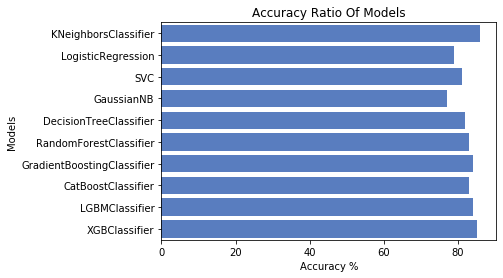

In [81]:
result = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    accuracy = round(model.score(X_train, y_train),2)    
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
sns.set_color_codes("muted")
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="b")
plt.xlabel('Accuracy %')
plt.title('Accuracy Ratio Of Models');   

---Cross-validation Accuracy Scores---
                     Model      Score
3                  XGBoost  82.722478
8                     LGBM  82.607621
9                     CATB  82.158126
6  Gradient Boosting Trees  81.934712
7                     CART  81.707440
0                      KNN  81.155686
5            Random Forest  80.920894
4               Linear SVC  80.691096
1      Logistic Regression  78.902054
2     Gaussian Naive Bayes  76.892095


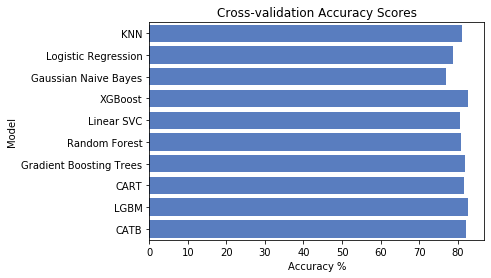

In [82]:
cv_models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Gaussian Naive Bayes', 
              'XGBoost', 'Linear SVC', 
              'Random Forest', 'Gradient Boosting Trees', 'CART', 'LGBM','CATB'],
    'Score': [
        knn_cv_score, 
        loj_cv_score,      
        nb_cv_score, 
        xgb_cv_score, 
        svc_cv_score, 
        rf_cv_score,
        gbm_cv_score,
        cart_cv_score,
        lgbm_cv_score,
        catb_cv_score
    ]})
print('---Cross-validation Accuracy Scores---')
print(cv_models.sort_values(by='Score', ascending=False))

sns.set_color_codes("muted")
sns.barplot(x= 'Score', y = 'Model', data=cv_models, color="b")
plt.xlabel('Accuracy %')
plt.title('Cross-validation Accuracy Scores');   

For model selection, KNN is very good before K-fold CV operation but, after the CV, XGBoost looks more consistent and successful. The reason why we care about K-fold CV so much, it makes the model more robust.For me, the robustness is more important than high accuracy. Thus, I pick XGBoost over KNN and others.